**I have downloaded audio from: https://freetts.com**

**And followed the youtube video: https://www.youtube.com/watch?v=4avzkN7BqTI to transform the mp3 file to a mav file**

In [21]:
#!pip install pydub
from pydub import AudioSegment

src = "audio/Strawberry.mp3"
dst = "audio/Strawberry.wav"

sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='audio/Strawberry.wav'>

**I have followed the youtube video: https://www.youtube.com/watch?v=ZqpSb5p1xQo**

In [22]:
#!pip install librosa
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
    
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [23]:
audio_files = glob('audio/*.wav')

In [24]:
ipd.Audio(audio_files[0])

In [25]:
y, sr = librosa.load(audio_files[1])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-0.00228882 -0.00231934 -0.00250244 -0.00218201 -0.00187683 -0.0018158
 -0.00195312 -0.00218201 -0.00241089 -0.00279236]
shape y: (44100,)
sr: 22050


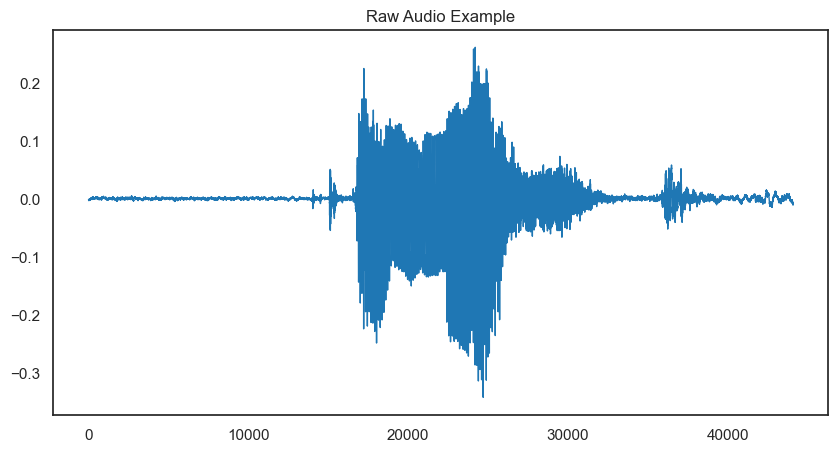

In [26]:
pd.Series(y).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Example',
                  color= color_pal[0])
plt.show()

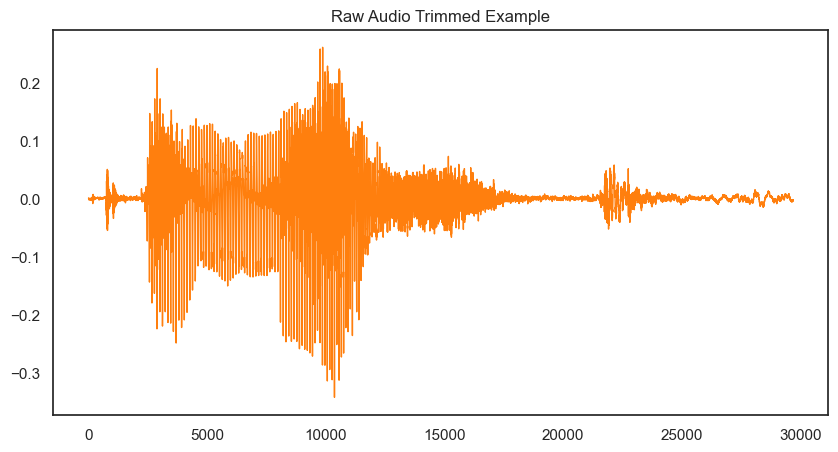

In [27]:
y_trimmed, _ = librosa.effects.trim(y, top_db=30)
pd.Series(y_trimmed).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Trimmed Example',
                  color= color_pal[1])
plt.show()

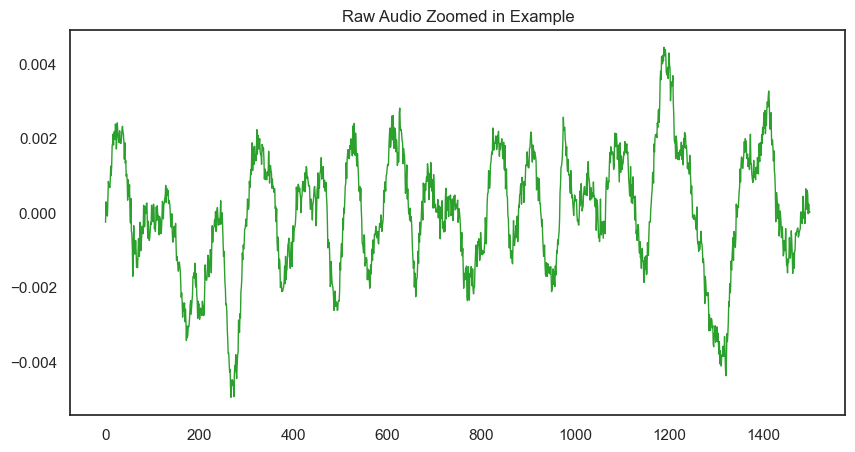

In [28]:
pd.Series(y[1500:3000]).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Zoomed in Example',
                  color= color_pal[2])
plt.show()

In [29]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref= np.max)
S_db.shape

(1025, 87)

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

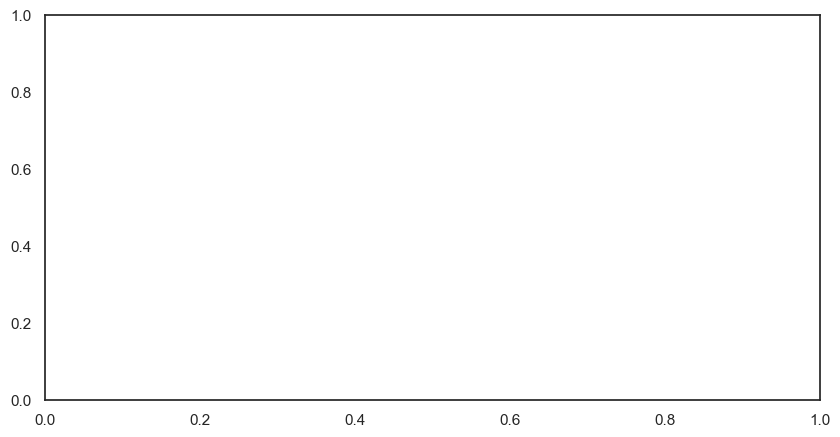

In [30]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [31]:
S = librosa.feature.melspectrogram(y=y, 
                               sr=sr, 
                               n_mels=128*2)
S_db_mel = librosa.amplitude_to_db(S, ref= np.max)

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

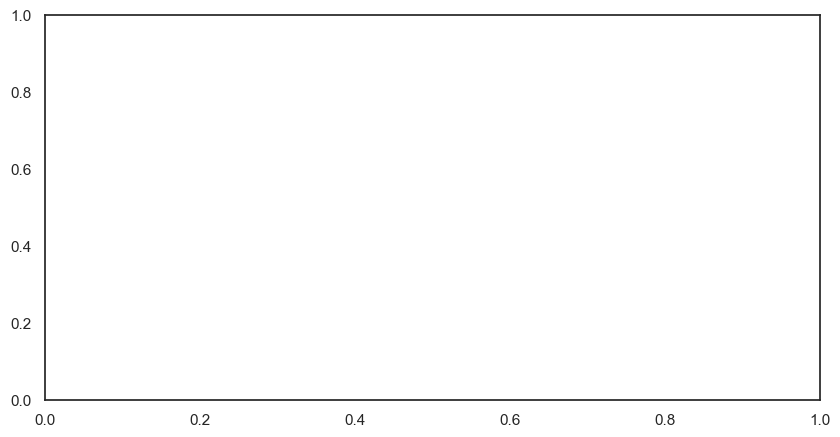

In [32]:
# Plot the mel spectogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

**I am able to convert speech to text following this youtube video: https://www.youtube.com/watch?v=LEDpgye3bf4**

In [33]:
#!pip install speechrecognition
#!pip install pyttsx3
#!brew install portaudio (in terminal)
#!conda install PyAudio
#!sudo apt-get purge --remove python-pyaudio

In [34]:
import speech_recognition as sr
import pyttsx3

In [35]:
r = sr.Recognizer()
def record_text():
    while(1):
        try:
            with sr.Microphone() as source2:
                r.adjust_for_ambient_noice(source2,duration=0.2)
                audio2 = r.listen(source2)
                MyText = r.recognize_google(audio2)
                return MyText
            
        except sr.RequestError as e:
            print("Could not request results: {0}".format(e))
        except sr.UnknownValueError:
            print("Unknown error occurred")
    
    return

**I am able to record in .mav if I follow this youtube video: https://www.youtube.com/watch?v=-pkBP7wOVPY**

In [36]:
#!pip install pvrecorder -q

In [37]:
from pvrecorder import PvRecorder
import wave, struct

In [38]:
for index, device in enumerate(PvRecorder.get_available_devices()):
    print(f"[{index}] {device}")

[0] MacBook Air Microphone
[1] Microsoft Teams Audio


In [39]:
recorder = PvRecorder(device_index=0, frame_length= 512) #(32 milliseconds of 16kHz audio)
audio = []
path = 'audio/audio_recording.wav'
#TranscriptText = ''

try:
    recorder.start()
    
    while True:
        frame = recorder.read()
        audio.extend(frame)
        #TranscriptText = record_text()
except KeyboardInterrupt:
    recorder.stop()
    with wave.open(path, 'w') as f:
        f.setparams((1, 2, 16000, 512, "NONE", "NONE"))
        f.writeframes(struct.pack("h"* len(audio), *audio))
finally:
    recorder.delete()
    #print(TranscriptText)

In [40]:
#!pip install allosaurus

In [75]:
from allosaurus.app import read_recognizer, get_all_models

# load your model

pm = read_recognizer('fa02024').pm
am = read_recognizer('fa02024').am
lm = read_recognizer('fa02024').lm
config = read_recognizer('fa2024').config
#model = read_recognizer()
#pm = read_recognizer().pm
#print(pm)
#am = read_recognizer().am
#print(am)
#lm = read_recognizer().lm
#print(lm)

In [42]:
model_fao = read_recognizer('fa2024')
model_fao.recognize('audio/audio_recording.wav', topk=2)

'd (0.398) <blk> (0.162) | ɪ (0.212) <blk> (0.172) | a (0.279) <blk> (0.175) | ɪ (0.363) <blk> (0.203) | a (0.233) ɪ (0.116) | s (0.403) <blk> (0.216)'

In [43]:
# allosaurus/allosaurus/app.py on github
from allosaurus.am.utils import *
#from pathlib import Path
from allosaurus.audio import read_audio
#from allosaurus.pm.factory import read_pm
#from allosaurus.am.factory import read_am
#from allosaurus.lm.factory import read_lm
#from allosaurus.bin.download_model import download_model
#from allosaurus.model import resolve_model_name, get_all_models
#from argparse import Namespace
#from io import BytesIO
#import torch

audio = read_audio('audio/siga.wav')
feat = pm.compute(audio)
#print('feat: ', feat)

feats = np.expand_dims(feat, 0)
#print('feats: ', feats)

feat_len = np.array([feat.shape[0]], dtype=np.int32)
# print('feat_len: ', feat_len)

tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
print('tensor_batch_feat: ', tensor_batch_feat)
# print('tensor_batch_feat_len:', tensor_batch_feat_len)

tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)
print('tensor_batch_lprobs: ', tensor_batch_lprobs)
print('tensor 1 lsit', tensor_batch_lprobs[0][1])

tensor_batch_lprobs_second_len = tensor_batch_lprobs.size(1)
tensor_batch_lprobs_inner_len = tensor_batch_lprobs.size(2)
print('tensor_batch_lprobs second len: ', tensor_batch_lprobs_second_len)
print('tensor_batch_lprobs inner len: ', tensor_batch_lprobs_inner_len)

highest_position = torch.max(tensor_batch_lprobs, dim=2)
print("Highest position in the innermost list:", highest_position)
# Sort each innermost list in descending order
sorted_tensor, indices = torch.sort(tensor_batch_lprobs, dim=2, descending=True)
# Get the indices of the second highest number in each innermost list
second_highest_position = indices[:,:,1]  # Second element in the sorted list
print("Position of the second highest number in each innermost list:", second_highest_position)

fao_phones = "pʰ b tʰ d kʰ g f v s ʃ ʂ ʒ h m m̥ n n̥ ŋ ŋ̊ l l̥ j w ɹ i a ɪ e ɛ y ʏ ø æ u ʊ o ɔ ʉ ð θ ə aː eː iː oː uː øː lː sː yː ɹː ʂː dː nː mː ʃː ʊː tʰː bː gː ɔː fː ɛː ɪː vː æː ʒː wː ʏː pʰː jː m̥ː "
# Count the spaces between the quotation marks
fao_phones_count = fao_phones.count(' ')
# Find the index of the nth space
start_index = 0
find_index = 9
for _ in range(find_index-1):
    start_index = fao_phones.find(' ', start_index + 1)
# Find the index of the (n+1)th space
end_index = fao_phones.find(' ', start_index + 1)
# Extract the phone between the nth and (n+1)th space
desired_phone = fao_phones[start_index + 1:end_index]
print(desired_phone)

print("Number of spaces between the quotation marks:", fao_phones_count)
#_ɒduː


tensor_batch_feat:  tensor([[[-0.9889,  0.0053,  0.3451,  ...,  0.6929,  1.3791, -0.5026],
         [-0.7355,  0.0085,  0.2246,  ...,  1.1054,  0.7267, -1.0898],
         [-0.6361, -0.4115, -0.2081,  ..., -0.5743, -0.1900, -0.0634],
         ...,
         [-0.9805,  0.6925,  0.4009,  ..., -0.6163, -0.1021, -1.3120],
         [-0.8319,  0.3180,  0.0053,  ...,  0.3459, -1.5706, -1.0971],
         [-0.8995,  0.2441,  0.2028,  ..., -0.7116, -0.4921, -0.0378]]])
tensor_batch_lprobs:  tensor([[[ 1.2638e+01,  5.2555e-01,  2.1423e+00,  ...,  7.9800e-01,
           1.7873e-01,  5.1137e-01],
         [ 1.3683e+01,  5.8665e-01,  2.1762e+00,  ...,  9.3539e-01,
           2.0650e-01,  4.5690e-01],
         [ 1.4009e+01,  1.4142e-01,  2.0596e+00,  ...,  6.8812e-01,
           1.7537e-01,  1.8234e-03],
         ...,
         [ 1.2616e+01,  5.4411e-01,  1.5546e+00,  ...,  6.0053e-01,
           1.4235e-01,  7.5776e-02],
         [ 1.2952e+01,  4.3405e-01,  1.5171e+00,  ...,  6.8466e-01,
           1.4

# Using the whole matrix and pad with 0 for the length of the audio
## First three pronounciations - principal components 1, 2 and 3

In [44]:
from allosaurus.am.utils import *
from pathlib import Path
from allosaurus.audio import read_audio
from allosaurus.pm.factory import read_pm
from allosaurus.am.factory import read_am
from allosaurus.lm.factory import read_lm
from allosaurus.bin.download_model import download_model
from allosaurus.model import resolve_model_name, get_all_models
from argparse import Namespace
from io import BytesIO
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def prob_plot_point(audio):
    feat = pm.compute(audio)
    # print('feat: ', feat)
    
    feats = np.expand_dims(feat, 0)
    # print('feats: ', feats)
    
    feat_len = np.array([feat.shape[0]], dtype=np.int32)
    # print('feat_len: ', feat_len)
    
    tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
    tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)

    array = tensor_batch_lprobs.detach().numpy()

    array = np.vstack(array)
    array = np.array([array])
    
    #print('tensor_batch_lprobs: ', array.shape)
    return array

def pad_array(array, max_m):
    padding_size = max_m - array.shape[1]
    padding = ((0, 0), (0, padding_size), (0, 0))
    return np.pad(array, padding, mode='constant', constant_values=0)

mz1_audio = read_audio('audio/telja/Mialy_1.wav')
mz1_array = prob_plot_point(mz1_audio)
hk1_audio = read_audio('audio/telja/Herborg_1.wav')
hk1_array = prob_plot_point(hk1_audio)
mk1_audio = read_audio('audio/telja/Marna_1.wav')
mk1_array = prob_plot_point(mk1_audio)
ok1_audio = read_audio('audio/telja/Ola_1.wav')
ok1_array = prob_plot_point(ok1_audio)

mz2_audio = read_audio('audio/telja/Mialy_2.wav')
mz2_array = prob_plot_point(mz2_audio)
hk2_audio = read_audio('audio/telja/Herborg_2.wav')
hk2_array = prob_plot_point(hk2_audio)
mk2_audio = read_audio('audio/telja/Marna_2.wav')
mk2_array = prob_plot_point(mk2_audio)
ok2_audio = read_audio('audio/telja/Ola_2.wav')
ok2_array = prob_plot_point(ok2_audio)

mz3_audio = read_audio('audio/telja/Mialy_3.wav')
mz3_array = prob_plot_point(mz3_audio)
hk3_audio = read_audio('audio/telja/Herborg_3.wav')
hk3_array = prob_plot_point(hk3_audio)
mk3_audio = read_audio('audio/telja/Marna_3.wav')
mk3_array = prob_plot_point(mk3_audio)
ok3_audio = read_audio('audio/telja/Ola_3.wav')
ok3_array = prob_plot_point(ok3_audio)

mz4_audio = read_audio('audio/telja/Mialy_4.wav')
mz4_array = prob_plot_point(mz4_audio)
hk4_audio = read_audio('audio/telja/Herborg_4.wav')
hk4_array = prob_plot_point(hk4_audio)
mk4_audio = read_audio('audio/telja/Marna_4.wav')
mk4_array = prob_plot_point(mk4_audio)
ok4_audio = read_audio('audio/telja/Ola_4.wav')
ok4_array = prob_plot_point(ok4_audio)

mz5_audio = read_audio('audio/telja/Mialy_5.wav')
mz5_array = prob_plot_point(mz5_audio)
hk5_audio = read_audio('audio/telja/Herborg_5.wav')
hk5_array = prob_plot_point(hk5_audio)
mk5_audio = read_audio('audio/telja/Marna_5.wav')
mk5_array = prob_plot_point(mk5_audio)
ok5_audio = read_audio('audio/telja/Ola_5.wav')
ok5_array = prob_plot_point(ok5_audio)

mz6_audio = read_audio('audio/telja/Mialy_6.wav')
mz6_array = prob_plot_point(mz6_audio)
hk6_audio = read_audio('audio/telja/Herborg_6.wav')
hk6_array = prob_plot_point(hk6_audio)
mk6_audio = read_audio('audio/telja/Marna_6.wav')
mk6_array = prob_plot_point(mk6_audio)
ok6_audio = read_audio('audio/telja/Ola_6.wav')
ok6_array = prob_plot_point(ok6_audio)

mz7_audio = read_audio('audio/telja/Mialy_7.wav')
mz7_array = prob_plot_point(mz7_audio)
hk7_audio = read_audio('audio/telja/Herborg_7.wav')
hk7_array = prob_plot_point(hk7_audio)
mk7_audio = read_audio('audio/telja/Marna_7.wav')
mk7_array = prob_plot_point(mk7_audio)
ok7_audio = read_audio('audio/telja/Ola_7.wav')
ok7_array = prob_plot_point(ok7_audio)

mz8_audio = read_audio('audio/telja/Mialy_8.wav')
mz8_array = prob_plot_point(mz8_audio)
hk8_audio = read_audio('audio/telja/Herborg_8.wav')
hk8_array = prob_plot_point(hk8_audio)
mk8_audio = read_audio('audio/telja/Marna_8.wav')
mk8_array = prob_plot_point(mk8_audio)
ok8_audio = read_audio('audio/telja/Ola_8.wav')
ok8_array = prob_plot_point(ok8_audio)

mz9_audio = read_audio('audio/telja/Mialy_9.wav')
mz9_array = prob_plot_point(mz9_audio)
hk9_audio = read_audio('audio/telja/Herborg_9.wav')
hk9_array = prob_plot_point(hk9_audio)
mk9_audio = read_audio('audio/telja/Marna_9.wav')
mk9_array = prob_plot_point(mk9_audio)
ok9_audio = read_audio('audio/telja/Ola_9.wav')
ok9_array = prob_plot_point(ok9_audio)

mz10_audio = read_audio('audio/telja/Mialy_10.wav')
mz10_array = prob_plot_point(mz10_audio)
hk10_audio = read_audio('audio/telja/Herborg_10.wav')
hk10_array = prob_plot_point(hk10_audio)
mk10_audio = read_audio('audio/telja/Marna_10.wav')
mk10_array = prob_plot_point(mk10_audio)
ok10_audio = read_audio('audio/telja/Ola_10.wav')
ok10_array = prob_plot_point(ok10_audio)

# List of arrays
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array]
# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

print(data_matrices.shape)

(12, 82, 73)


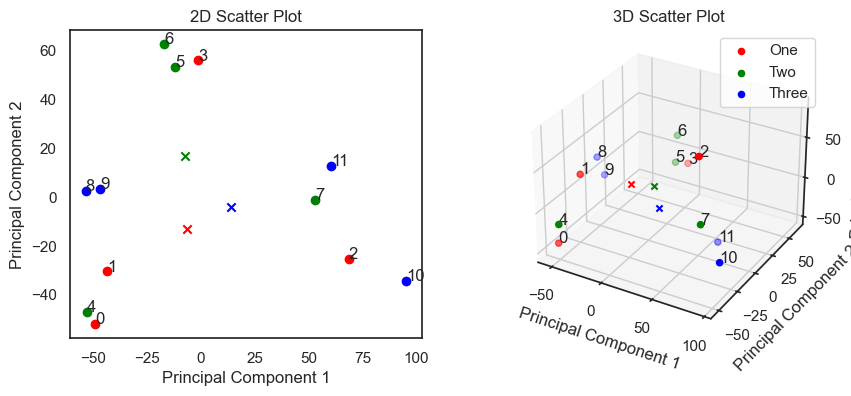

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices])

# Apply PCA to reduce the dimensionality to 10D
pca = PCA(n_components=12)
data_pca = pca.fit_transform(data_vectors)

# create subplots
fig = plt.figure(figsize=(10, 4))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)
centre_two = data_pca[4:8].mean(axis=0)
centre_three = data_pca[8:12].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 1

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.set_title("2D Scatter Plot")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax1.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))



pca_pos1 = 0
pca_pos2 = 1
pca_pos3 = 2

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='One')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='Two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='Three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')

ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax2.text(data_pca[i, pca_pos1], data_pca[i, pca_pos2], data_pca[i, pca_pos3], str(txt))

plt.legend()
plt.show()

In [46]:
print(pca.explained_variance_)

[2.9970344e+03 1.6121719e+03 1.3651021e+03 1.1794559e+03 9.3636823e+02
 8.7259436e+02 8.2502051e+02 6.8611639e+02 5.5798340e+02 4.6011465e+02
 4.0875507e+02 9.0643661e-09]


# using the matrix only where the phones are shown and pad with 0 for length
## First three pronounciations - principal components 1, 2 and 3

In [47]:
from allosaurus.am.utils import *
from pathlib import Path
from allosaurus.audio import read_audio
from allosaurus.pm.factory import read_pm
from allosaurus.am.factory import read_am
from allosaurus.lm.factory import read_lm
from allosaurus.bin.download_model import download_model
from allosaurus.model import resolve_model_name, get_all_models
from argparse import Namespace
from io import BytesIO
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def prob_plot_point(audio):
    feat = pm.compute(audio)
    # print('feat: ', feat)
    
    feats = np.expand_dims(feat, 0)
    # print('feats: ', feats)
    
    feat_len = np.array([feat.shape[0]], dtype=np.int32)
    # print('feat_len: ', feat_len)
    
    tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
    tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)

    # to get highest position
    sorted_tensor, indices = torch.sort(tensor_batch_lprobs, dim=2, descending=True)
    highest_position = indices[:,:,0]
    highest_position_array = highest_position.detach().numpy()

    array = tensor_batch_lprobs.detach().numpy()
    output_array = []
    output_reshaped = []

    for hp in highest_position_array:
        for idh, h in enumerate(hp):
            if h != 0:
                output_array.append(array[0][idh])

    output_array = np.vstack(output_array)
    output_reshaped = np.array([output_array])
    
    #print('tensor_batch_lprobs: ', output_reshaped.shape)
    return output_reshaped

def pad_array(array, max_m):
    padding_size = max_m - array.shape[1]
    padding = ((0, 0), (0, padding_size), (0, 0))
    return np.pad(array, padding, mode='constant', constant_values=0)

mz1_array = prob_plot_point(mz1_audio)
hk1_array = prob_plot_point(hk1_audio)
mk1_array = prob_plot_point(mk1_audio)
ok1_array = prob_plot_point(ok1_audio)

mz2_array = prob_plot_point(mz2_audio)
hk2_array = prob_plot_point(hk2_audio)
mk2_array = prob_plot_point(mk2_audio)
ok2_array = prob_plot_point(ok2_audio)

mz3_array = prob_plot_point(mz3_audio)
hk3_array = prob_plot_point(hk3_audio)
mk3_array = prob_plot_point(mk3_audio)
ok3_array = prob_plot_point(ok3_audio)

mz4_array = prob_plot_point(mz4_audio)
hk4_array = prob_plot_point(hk4_audio)
mk4_array = prob_plot_point(mk4_audio)
ok4_array = prob_plot_point(ok4_audio)

mz5_array = prob_plot_point(mz5_audio)
hk5_array = prob_plot_point(hk5_audio)
mk5_array = prob_plot_point(mk5_audio)
ok5_array = prob_plot_point(ok5_audio)

mz6_array = prob_plot_point(mz6_audio)
hk6_array = prob_plot_point(hk6_audio)
mk6_array = prob_plot_point(mk6_audio)
ok6_array = prob_plot_point(ok6_audio)

mz7_array = prob_plot_point(mz7_audio)
hk7_array = prob_plot_point(hk7_audio)
mk7_array = prob_plot_point(mk7_audio)
ok7_array = prob_plot_point(ok7_audio)

mz8_array = prob_plot_point(mz8_audio)
hk8_array = prob_plot_point(hk8_audio)
mk8_array = prob_plot_point(mk8_audio)
ok8_array = prob_plot_point(ok8_audio)

mz9_array = prob_plot_point(mz9_audio)
hk9_array = prob_plot_point(hk9_audio)
mk9_array = prob_plot_point(mk9_audio)
ok9_array = prob_plot_point(ok9_audio)

mz10_array = prob_plot_point(mz10_audio)
hk10_array = prob_plot_point(hk10_audio)
mk10_array = prob_plot_point(mk10_audio)
ok10_array = prob_plot_point(ok10_audio)

# List of arrays
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array]
# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

print(data_matrices.shape)

(12, 5, 73)


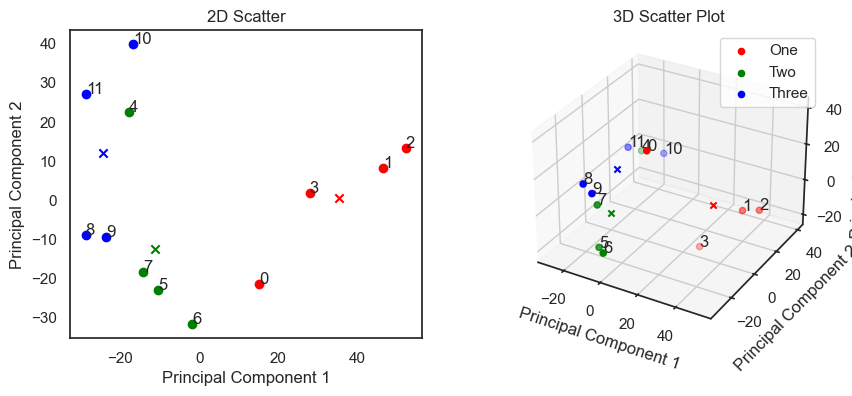

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices])

# Apply PCA to reduce the dimensionality to 10D
pca = PCA(n_components=12)
data_pca = pca.fit_transform(data_vectors)

# create subplots
fig = plt.figure(figsize=(10, 4))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)
centre_two = data_pca[4:8].mean(axis=0)
centre_three = data_pca[8:12].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 1

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.set_title("2D Scatter")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax1.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))



pca_pos1 = 0
pca_pos2 = 1
pca_pos3 = 2

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='One')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='Two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='Three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')

ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax2.text(data_pca[i, pca_pos1], data_pca[i, pca_pos2], data_pca[i, pca_pos3], str(txt))

plt.legend()
plt.show()

In [49]:
print(pca.explained_variance_)

[8.1574194e+02 5.0804620e+02 2.4925043e+02 1.6043947e+02 1.3490532e+02
 1.2004490e+02 7.4354279e+01 5.8219700e+01 3.3468971e+01 3.0609394e+01
 1.6566339e+01 3.0021458e-11]


# using the matrix only where the phones are shown and pad with 0 for length
## First three pronounciations - principal components 1, 2 and 4

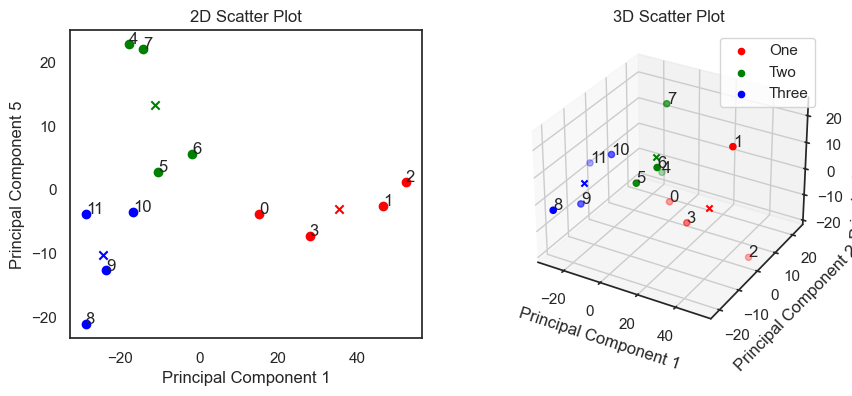

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# create subplots
fig = plt.figure(figsize=(10, 4))

pca_pos1 = 0
pca_pos2 = 3

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.set_title("2D Scatter Plot")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 5")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax1.annotate(txt, (data_pca[i, pca_pos1], data_pca[i, pca_pos2]))



pca_pos1 = 0
pca_pos2 = 3
pca_pos3 = 4

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='One')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='Two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='Three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')

ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 4")

# Annotate points for clarity
for i, txt in enumerate(range(len(data_matrices))):
    ax2.text(data_pca[i, pca_pos1], data_pca[i, pca_pos2], data_pca[i, pca_pos3], str(txt))

plt.legend()
plt.show()

# using the matrix only where the phones are shown and pad with 0 for length
## All ten pronounciations - principal components 1, 2 and 3

In [51]:
# List of arrays
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array, mz4_array, hk4_array, mk4_array, ok4_array, mz5_array, hk5_array, mk5_array, ok5_array, mz6_array, hk6_array, mk6_array, ok6_array, mz7_array, hk7_array, mk7_array, ok7_array, mz8_array, hk8_array, mk8_array, ok8_array, mz9_array, hk9_array, mk9_array, ok9_array, mz10_array, hk10_array, mk10_array, ok10_array]
# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)
# Pad all arrays to have the same shape
padded_arrays = [pad_array(array, max_m) for array in arrays]
# Concatenate the padded arrays along the first dimension
data_matrices = np.concatenate(padded_arrays, axis=0)

print(data_matrices.shape)

(40, 6, 73)


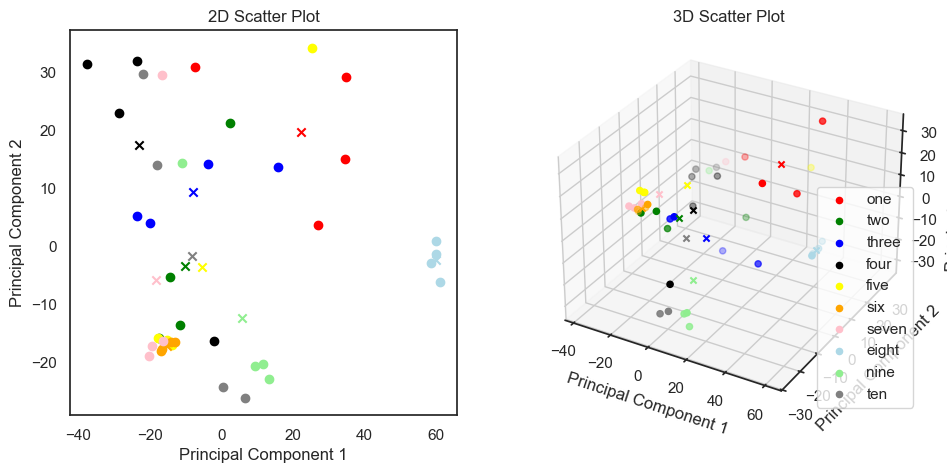

In [52]:
from mpl_toolkits.mplot3d import Axes3D

# Flatten each matrix to a single high-dimensional vector
data_vectors = np.array([matrix.flatten() for matrix in data_matrices])

# Apply PCA to reduce the dimensionality to 10D
pca = PCA(n_components=40)
data_pca = pca.fit_transform(data_vectors)

# create subplots
fig = plt.figure(figsize=(11, 5))

# the centre for each pronunciation
centre_one = data_pca[:4].mean(axis=0)
centre_two = data_pca[4:8].mean(axis=0)
centre_three = data_pca[8:12].mean(axis=0)
centre_four = data_pca[12:16].mean(axis=0)
centre_five = data_pca[16:20].mean(axis=0)
centre_six = data_pca[20:24].mean(axis=0)
centre_seven = data_pca[24:28].mean(axis=0)
centre_eight = data_pca[28:32].mean(axis=0)
centre_nine = data_pca[32:36].mean(axis=0)
centre_ten = data_pca[36:40].mean(axis=0)

pca_pos1 = 0
pca_pos2 = 1

# Plotting the data points
ax1 = fig.add_subplot(121)
ax1.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], c='red')
ax1.scatter(centre_one[pca_pos1], centre_one[pca_pos2], c='red', marker='x')
ax1.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], c='green')
ax1.scatter(centre_two[pca_pos1], centre_two[pca_pos2], c='green', marker='x')
ax1.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], c='blue')
ax1.scatter(centre_three[pca_pos1], centre_three[pca_pos2], c='blue', marker='x')
ax1.scatter(data_pca[12:16, pca_pos1], data_pca[12:16, pca_pos2], c='black')
ax1.scatter(centre_four[pca_pos1], centre_four[pca_pos2], c='black', marker='x')
ax1.scatter(data_pca[16:20, pca_pos1], data_pca[16:20, pca_pos2], c='yellow')
ax1.scatter(centre_five[pca_pos1], centre_five[pca_pos2], c='yellow', marker='x')
ax1.scatter(data_pca[20:24, pca_pos1], data_pca[20:24, pca_pos2], c='orange')
ax1.scatter(centre_six[pca_pos1], centre_six[pca_pos2], c='orange', marker='x')
ax1.scatter(data_pca[24:28, pca_pos1], data_pca[24:28, pca_pos2], c='pink')
ax1.scatter(centre_seven[pca_pos1], centre_seven[pca_pos2], c='pink', marker='x')
ax1.scatter(data_pca[28:32, pca_pos1], data_pca[28:32, pca_pos2], c='lightblue')
ax1.scatter(centre_eight[pca_pos1], centre_eight[pca_pos2], c='lightblue', marker='x')
ax1.scatter(data_pca[32:36, pca_pos1], data_pca[32:36, pca_pos2], c='lightgreen')
ax1.scatter(centre_nine[pca_pos1], centre_nine[pca_pos2], c='lightgreen', marker='x')
ax1.scatter(data_pca[36:40, pca_pos1], data_pca[36:40, pca_pos2], c='gray')
ax1.scatter(centre_ten[pca_pos1], centre_ten[pca_pos2], c='gray', marker='x')
ax1.set_title("2D Scatter Plot")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")



pca_pos1 = 0
pca_pos2 = 1
pca_pos3 = 2

# Plot the first set of points in red, second green and third blue
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_pca[:4, pca_pos1], data_pca[:4, pca_pos2], data_pca[:4, pca_pos3], c='red', label='one')
ax2.scatter(centre_one[pca_pos1], centre_one[pca_pos2], centre_one[pca_pos3], c='red', marker='x')
ax2.scatter(data_pca[4:8, pca_pos1], data_pca[4:8, pca_pos2], data_pca[4:8, pca_pos3], c='green', label='two')
ax2.scatter(centre_two[pca_pos1], centre_two[pca_pos2], centre_two[pca_pos3], c='green', marker='x')
ax2.scatter(data_pca[8:12, pca_pos1], data_pca[8:12, pca_pos2], data_pca[8:12, pca_pos3], c='blue', label='three')
ax2.scatter(centre_three[pca_pos1], centre_three[pca_pos2], centre_three[pca_pos3], c='blue', marker='x')
ax2.scatter(data_pca[12:16, pca_pos1], data_pca[12:16, pca_pos2], data_pca[12:16, pca_pos3], c='black', label='four')
ax2.scatter(centre_four[pca_pos1], centre_four[pca_pos2], centre_four[pca_pos3], c='black', marker='x')
ax2.scatter(data_pca[16:20, pca_pos1], data_pca[16:20, pca_pos2], data_pca[16:20, pca_pos3], c='yellow', label='five')
ax2.scatter(centre_five[pca_pos1], centre_five[pca_pos2], centre_five[pca_pos3], c='yellow', marker='x')
ax2.scatter(data_pca[20:24, pca_pos1], data_pca[20:24, pca_pos2], data_pca[20:24, pca_pos3], c='orange', label='six')
ax2.scatter(centre_six[pca_pos1], centre_six[pca_pos2], centre_six[pca_pos3], c='orange', marker='x')
ax2.scatter(data_pca[24:28, pca_pos1], data_pca[24:28, pca_pos2], data_pca[24:28, pca_pos3], c='pink', label='seven')
ax2.scatter(centre_seven[pca_pos1], centre_seven[pca_pos2], centre_seven[pca_pos3], c='pink', marker='x')
ax2.scatter(data_pca[28:32, pca_pos1], data_pca[28:32, pca_pos2], data_pca[28:32, pca_pos3], c='lightblue', label='eight')
ax2.scatter(centre_eight[pca_pos1], centre_eight[pca_pos2], centre_eight[pca_pos3], c='lightblue', marker='x')
ax2.scatter(data_pca[32:36, pca_pos1], data_pca[32:36, pca_pos2], data_pca[32:36, pca_pos3], c='lightgreen', label='nine')
ax2.scatter(centre_nine[pca_pos1], centre_nine[pca_pos2], centre_nine[pca_pos3], c='lightgreen', marker='x')
ax2.scatter(data_pca[36:40, pca_pos1], data_pca[36:40, pca_pos2], data_pca[36:40, pca_pos3], c='gray', label='ten')
ax2.scatter(centre_ten[pca_pos1], centre_ten[pca_pos2], centre_ten[pca_pos3], c='gray', marker='x')

ax2.set_title("3D Scatter Plot")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")

plt.legend()
plt.show()

In [53]:
print(pca.explained_variance_)

[6.9885931e+02 3.8781985e+02 2.6585678e+02 2.3451996e+02 1.0552982e+02
 9.7327873e+01 6.8781471e+01 6.0527939e+01 5.2601711e+01 3.8065556e+01
 3.5164890e+01 3.3023895e+01 3.0608744e+01 2.7488033e+01 2.0873671e+01
 1.9416798e+01 1.7266649e+01 1.3166152e+01 1.2685589e+01 1.1954191e+01
 1.0394668e+01 9.0432081e+00 8.3614874e+00 7.3137698e+00 6.5156889e+00
 5.0029554e+00 4.9000902e+00 4.3094363e+00 3.8386602e+00 3.3708501e+00
 2.8097844e+00 2.2196968e+00 2.0397005e+00 1.9619995e+00 1.7564367e+00
 1.6473074e+00 1.3839892e+00 9.7164243e-01 7.0019192e-01 3.9725553e-11]


# Euclidean distance

In [54]:
from allosaurus.am.utils import *
from pathlib import Path
from allosaurus.audio import read_audio
from allosaurus.pm.factory import read_pm
from allosaurus.am.factory import read_am
from allosaurus.lm.factory import read_lm
from allosaurus.bin.download_model import download_model
from allosaurus.model import resolve_model_name, get_all_models
from argparse import Namespace
from io import BytesIO
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def prob_plot_point(audio):
    feat = pm.compute(audio)
    # print('feat: ', feat)
    
    feats = np.expand_dims(feat, 0)
    # print('feats: ', feats)
    
    feat_len = np.array([feat.shape[0]], dtype=np.int32)
    # print('feat_len: ', feat_len)
    
    tensor_batch_feat, tensor_batch_feat_len = move_to_tensor([feats, feat_len], config.device_id)
    tensor_batch_lprobs = am(tensor_batch_feat, tensor_batch_feat_len)

    # to get highest position
    sorted_tensor, indices = torch.sort(tensor_batch_lprobs, dim=2, descending=True)
    highest_position = indices[:,:,0]
    highest_position_array = highest_position.detach().numpy()

    np_array = tensor_batch_lprobs.detach().numpy()
    output_array = []

    for hp in highest_position_array:
        for idh, h in enumerate(hp):
            if h != 0:
                output_array.append(np_array[0][idh])

    output_array = np.vstack(output_array)
    output_array = np.array([output_array])
    
    #print('tensor_batch_lprobs: ', output_reshaped.shape)
    return output_array

def pad_array(array, max_m):
    padding_size = max_m - array.shape[1]
    padding = ((0, 0), (0, padding_size), (0, 0))
    return np.pad(array, padding, mode='constant', constant_values=0)

mz1_audio = read_audio('audio/telja/Mialy_1.wav')
mz1_array = prob_plot_point(mz1_audio)
hk1_audio = read_audio('audio/telja/Herborg_1.wav')
hk1_array = prob_plot_point(hk1_audio)
mk1_audio = read_audio('audio/telja/Marna_1.wav')
mk1_array = prob_plot_point(mk1_audio)
ok1_audio = read_audio('audio/telja/Ola_1.wav')
ok1_array = prob_plot_point(ok1_audio)

mz2_audio = read_audio('audio/telja/Mialy_2.wav')
mz2_array = prob_plot_point(mz2_audio)
hk2_audio = read_audio('audio/telja/Herborg_2.wav')
hk2_array = prob_plot_point(hk2_audio)
mk2_audio = read_audio('audio/telja/Marna_2.wav')
mk2_array = prob_plot_point(mk2_audio)
ok2_audio = read_audio('audio/telja/Ola_2.wav')
ok2_array = prob_plot_point(ok2_audio)

mz3_audio = read_audio('audio/telja/Mialy_3.wav')
mz3_array = prob_plot_point(mz3_audio)
hk3_audio = read_audio('audio/telja/Herborg_3.wav')
hk3_array = prob_plot_point(hk3_audio)
mk3_audio = read_audio('audio/telja/Marna_3.wav')
mk3_array = prob_plot_point(mk3_audio)
ok3_audio = read_audio('audio/telja/Ola_3.wav')
ok3_array = prob_plot_point(ok3_audio)

mz4_audio = read_audio('audio/telja/Mialy_4.wav')
mz4_array = prob_plot_point(mz4_audio)
hk4_audio = read_audio('audio/telja/Herborg_4.wav')
hk4_array = prob_plot_point(hk4_audio)
mk4_audio = read_audio('audio/telja/Marna_4.wav')
mk4_array = prob_plot_point(mk4_audio)
ok4_audio = read_audio('audio/telja/Ola_4.wav')
ok4_array = prob_plot_point(ok4_audio)

mz5_audio = read_audio('audio/telja/Mialy_5.wav')
mz5_array = prob_plot_point(mz5_audio)
hk5_audio = read_audio('audio/telja/Herborg_5.wav')
hk5_array = prob_plot_point(hk5_audio)
mk5_audio = read_audio('audio/telja/Marna_5.wav')
mk5_array = prob_plot_point(mk5_audio)
ok5_audio = read_audio('audio/telja/Ola_5.wav')
ok5_array = prob_plot_point(ok5_audio)

mz6_audio = read_audio('audio/telja/Mialy_6.wav')
mz6_array = prob_plot_point(mz6_audio)
hk6_audio = read_audio('audio/telja/Herborg_6.wav')
hk6_array = prob_plot_point(hk6_audio)
mk6_audio = read_audio('audio/telja/Marna_6.wav')
mk6_array = prob_plot_point(mk6_audio)
ok6_audio = read_audio('audio/telja/Ola_6.wav')
ok6_array = prob_plot_point(ok6_audio)

mz7_audio = read_audio('audio/telja/Mialy_7.wav')
mz7_array = prob_plot_point(mz7_audio)
hk7_audio = read_audio('audio/telja/Herborg_7.wav')
hk7_array = prob_plot_point(hk7_audio)
mk7_audio = read_audio('audio/telja/Marna_7.wav')
mk7_array = prob_plot_point(mk7_audio)
ok7_audio = read_audio('audio/telja/Ola_7.wav')
ok7_array = prob_plot_point(ok7_audio)

mz8_audio = read_audio('audio/telja/Mialy_8.wav')
mz8_array = prob_plot_point(mz8_audio)
hk8_audio = read_audio('audio/telja/Herborg_8.wav')
hk8_array = prob_plot_point(hk8_audio)
mk8_audio = read_audio('audio/telja/Marna_8.wav')
mk8_array = prob_plot_point(mk8_audio)
ok8_audio = read_audio('audio/telja/Ola_8.wav')
ok8_array = prob_plot_point(ok8_audio)

mz9_audio = read_audio('audio/telja/Mialy_9.wav')
mz9_array = prob_plot_point(mz9_audio)
hk9_audio = read_audio('audio/telja/Herborg_9.wav')
hk9_array = prob_plot_point(hk9_audio)
mk9_audio = read_audio('audio/telja/Marna_9.wav')
mk9_array = prob_plot_point(mk9_audio)
ok9_audio = read_audio('audio/telja/Ola_9.wav')
ok9_array = prob_plot_point(ok9_audio)

mz10_audio = read_audio('audio/telja/Mialy_10.wav')
mz10_array = prob_plot_point(mz10_audio)
hk10_audio = read_audio('audio/telja/Herborg_10.wav')
hk10_array = prob_plot_point(hk10_audio)
mk10_audio = read_audio('audio/telja/Marna_10.wav')
mk10_array = prob_plot_point(mk10_audio)
ok10_audio = read_audio('audio/telja/Ola_10.wav')
ok10_array = prob_plot_point(ok10_audio)

# List of arrays
arrays = [mz1_array, hk1_array, mk1_array, ok1_array, mz2_array, hk2_array, mk2_array, ok2_array, mz3_array, hk3_array, mk3_array, ok3_array, mz4_array, hk4_array, mk4_array, ok4_array, mz5_array, hk5_array, mk5_array, ok5_array, mz6_array, hk6_array, mk6_array, ok6_array, mz7_array, hk7_array, mk7_array, ok7_array, mz8_array, hk8_array, mk8_array, ok8_array, mz9_array, hk9_array, mk9_array, ok9_array, mz10_array, hk10_array, mk10_array, ok10_array]

# Find the maximum size along the second dimension
max_m = max(array.shape[1] for array in arrays)

In [55]:
arrays_A = [mz1_array, hk1_array, mk1_array, ok1_array]

# Pad all arrays to have the same shape
padded_arrays_A = [pad_array(array, max_m) for array in arrays_A]

# Concatenate the padded arrays along the first dimension
data_matrices_A = np.concatenate(padded_arrays_A, axis=0)

# mean of A
mean_A = data_matrices_A.mean
mean_A = np.array([mean_A(0)])
#print(mean_A)
print(mean_A.shape)

(1, 6, 73)


In [56]:
arrays_B = [mz2_array, hk2_array, mk2_array, ok2_array]

# Pad all arrays to have the same shape
padded_arrays_B = [pad_array(array, max_m) for array in arrays_B]

# Concatenate the padded arrays along the first dimension
data_matrices_B = np.concatenate(padded_arrays_B, axis=0)

# mean of A
mean_B = data_matrices_B.mean
mean_B = np.array([mean_B(0)])

#print(mean_B)
print(mean_B.shape)

(1, 6, 73)


In [57]:
arrays_C = [mz3_array, hk3_array, mk3_array, ok3_array]

# Pad all arrays to have the same shape
padded_arrays_C = [pad_array(array, max_m) for array in arrays_C]

# Concatenate the padded arrays along the first dimension
data_matrices_C = np.concatenate(padded_arrays_C, axis=0)

# mean of A
mean_C = data_matrices_C.mean
mean_C = np.array([mean_C(0)])

#print(mean_C)
print(mean_C.shape)

(1, 6, 73)


In [58]:
arrays_D = [mz4_array, hk4_array, mk4_array, ok4_array]

# Pad all arrays to have the same shape
padded_arrays_D = [pad_array(array, max_m) for array in arrays_D]

# Concatenate the padded arrays along the first dimension
data_matrices_D = np.concatenate(padded_arrays_D, axis=0)

# mean of A
mean_D = data_matrices_D.mean
mean_D = np.array([mean_D(0)])

#print(mean_D)
print(mean_D.shape)

(1, 6, 73)


In [59]:
arrays_E = [mz5_array, hk5_array, mk5_array, ok5_array]

# Pad all arrays to have the same shape
padded_arrays_E = [pad_array(array, max_m) for array in arrays_E]

# Concatenate the padded arrays along the first dimension
data_matrices_E = np.concatenate(padded_arrays_E, axis=0)

# mean of A
mean_E = data_matrices_E.mean
mean_E = np.array([mean_E(0)])

#print(mean_E)
print(mean_E.shape)

(1, 6, 73)


In [60]:
arrays_F = [mz6_array, hk6_array, mk6_array, ok6_array]

# Pad all arrays to have the same shape
padded_arrays_F = [pad_array(array, max_m) for array in arrays_F]

# Concatenate the padded arrays along the first dimension
data_matrices_F = np.concatenate(padded_arrays_F, axis=0)

# mean of A
mean_F = data_matrices_F.mean
mean_F = np.array([mean_F(0)])

#print(mean_F)
print(mean_F.shape)

(1, 6, 73)


In [61]:
arrays_G = [mz7_array, hk7_array, mk7_array, ok7_array]

# Pad all arrays to have the same shape
padded_arrays_G = [pad_array(array, max_m) for array in arrays_G]

# Concatenate the padded arrays along the first dimension
data_matrices_G = np.concatenate(padded_arrays_G, axis=0)

# mean of A
mean_G = data_matrices_G.mean
mean_G = np.array([mean_G(0)])

#print(mean_G)
print(mean_G.shape)

(1, 6, 73)


In [62]:
arrays_H = [mz8_array, hk8_array, mk8_array, ok8_array]

# Pad all arrays to have the same shape
padded_arrays_H = [pad_array(array, max_m) for array in arrays_H]

# Concatenate the padded arrays along the first dimension
data_matrices_H = np.concatenate(padded_arrays_H, axis=0)

# mean of A
mean_H = data_matrices_H.mean
mean_H = np.array([mean_H(0)])

#print(mean_H)
print(mean_H.shape)

(1, 6, 73)


In [63]:
arrays_I = [mz9_array, hk9_array, mk9_array, ok9_array]

# Pad all arrays to have the same shape
padded_arrays_I = [pad_array(array, max_m) for array in arrays_I]

# Concatenate the padded arrays along the first dimension
data_matrices_I = np.concatenate(padded_arrays_I, axis=0)

# mean of A
mean_I = data_matrices_I.mean
mean_I = np.array([mean_I(0)])

#print(mean_I)
print(mean_I.shape)

(1, 6, 73)


In [64]:
arrays_J = [mz10_array, hk10_array, mk10_array, ok10_array]

# Pad all arrays to have the same shape
padded_arrays_J = [pad_array(array, max_m) for array in arrays_J]

# Concatenate the padded arrays along the first dimension
data_matrices_J = np.concatenate(padded_arrays_J, axis=0)

# mean of A
mean_J = data_matrices_J.mean
mean_J = np.array([mean_J(0)])

#print(mean_J)
print(mean_J.shape)

(1, 6, 73)


In [65]:
diff_A_A0 = [np.linalg.norm(mean_A[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_A[0][5])]
diff_A_A1 = [np.linalg.norm(mean_A[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_A[1][5])]
diff_A_A2 = [np.linalg.norm(mean_A[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_A[2][5])]
diff_A_A3 = [np.linalg.norm(mean_A[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_A[3][5])]
print('Euclidian distance of each phone between...')
print(np.argmax(data_matrices_A[0][1]))
print(data_matrices_A[0][1][0])
print(data_matrices_A[0][1][37])
print(data_matrices_A[0][1])
print('mean of all "one" and first "one" (', model_fao.recognize('audio/telja/Mialy_1.wav'), '):   ', diff_A_A0)
print('mean of all "one" and second "one" (', model_fao.recognize('audio/telja/Herborg_1.wav'), '):  ', diff_A_A1)
print('mean of all "one" and third "one" (', model_fao.recognize('audio/telja/Marna_1.wav'), '):   ', diff_A_A2)
print('mean of all "one" and fourth "one" (', model_fao.recognize('audio/telja/Ola_1.wav'), '):   ', diff_A_A3, '\n')

diff_A_B0 = [np.linalg.norm(mean_A[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_B[0][5])]
diff_A_B1 = [np.linalg.norm(mean_A[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_B[1][5])]
diff_A_B2 = [np.linalg.norm(mean_A[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_B[2][5])]
diff_A_B3 = [np.linalg.norm(mean_A[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_B[3][5])]
print('mean of all "one" and first "two" (', model_fao.recognize('audio/telja/Mialy_2.wav'), '):      ', diff_A_B0)
print('mean of all "one" and second "two" (', model_fao.recognize('audio/telja/Herborg_2.wav'), '):     ', diff_A_B1)
print('mean of all "one" and third "two" (', model_fao.recognize('audio/telja/Marna_2.wav'), '):      ', diff_A_B2)
print('mean of all "one" and fourth "two" (', model_fao.recognize('audio/telja/Ola_2.wav'), '):      ', diff_A_B3, '\n')

diff_A_C0 = [np.linalg.norm(mean_A[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_C[0][5])]
diff_A_C1 = [np.linalg.norm(mean_A[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_C[1][5])]
diff_A_C2 = [np.linalg.norm(mean_A[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_C[2][5])]
diff_A_C3 = [np.linalg.norm(mean_A[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_C[3][5])]
print('mean of all "one" and first "three" (', model_fao.recognize('audio/telja/Mialy_3.wav'), '):  ', diff_A_C0)
print('mean of all "one" and second "three" (', model_fao.recognize('audio/telja/Herborg_3.wav'), '): ', diff_A_C1)
print('mean of all "one" and third "three" (', model_fao.recognize('audio/telja/Marna_3.wav'), '):  ', diff_A_C2)
print('mean of all "one" and fourth "three" (', model_fao.recognize('audio/telja/Ola_3.wav'), '):', diff_A_C3, '\n')

diff_A_D0 = [np.linalg.norm(mean_A[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_D[0][5])]
diff_A_D1 = [np.linalg.norm(mean_A[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_D[1][5])]
diff_A_D2 = [np.linalg.norm(mean_A[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_D[2][5])]
diff_A_D3 = [np.linalg.norm(mean_A[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_D[3][5])]
print('mean of all "one" and first "four" (', model_fao.recognize('audio/telja/Mialy_4.wav'), '):  ', diff_A_D0)
print('mean of all "one" and second "four" (', model_fao.recognize('audio/telja/Herborg_4.wav'), '):', diff_A_D1)
print('mean of all "one" and third "four" (', model_fao.recognize('audio/telja/Marna_4.wav'), '):', diff_A_D2)
print('mean of all "one" and fourth "four" (', model_fao.recognize('audio/telja/Ola_4.wav'), '): ', diff_A_D3, '\n')

diff_A_E0 = [np.linalg.norm(mean_A[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_E[0][5])]
diff_A_E1 = [np.linalg.norm(mean_A[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_E[1][5])]
diff_A_E2 = [np.linalg.norm(mean_A[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_E[2][5])]
diff_A_E3 = [np.linalg.norm(mean_A[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_E[3][5])]
print('mean of all "one" and first "five" (', model_fao.recognize('audio/telja/Mialy_5.wav'), '):      ', diff_A_E0)
print('mean of all "one" and second "five" (', model_fao.recognize('audio/telja/Herborg_5.wav'), '):     ', diff_A_E1)
print('mean of all "one" and third "five" (', model_fao.recognize('audio/telja/Marna_5.wav'), '):   ', diff_A_E2)
print('mean of all "one" and fourth "five" (', model_fao.recognize('audio/telja/Ola_5.wav'), '):     ', diff_A_E3, '\n')

diff_A_F0 = [np.linalg.norm(mean_A[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_F[0][5])]
diff_A_F1 = [np.linalg.norm(mean_A[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_F[1][5])]
diff_A_F2 = [np.linalg.norm(mean_A[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_F[2][5])]
diff_A_F3 = [np.linalg.norm(mean_A[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_F[3][5])]
print('mean of all "one" and first "six" (', model_fao.recognize('audio/telja/Mialy_6.wav'), '):     ', diff_A_F0)
print('mean of all "one" and second "six" (', model_fao.recognize('audio/telja/Herborg_6.wav'), '):    ', diff_A_F1)
print('mean of all "one" and third "six" (', model_fao.recognize('audio/telja/Marna_6.wav'), '):       ', diff_A_F2)
print('mean of all "one" and fourth "six" (', model_fao.recognize('audio/telja/Ola_6.wav'), '):    ', diff_A_F3, '\n')

diff_A_G0 = [np.linalg.norm(mean_A[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_G[0][5])]
diff_A_G1 = [np.linalg.norm(mean_A[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_G[1][5])]
diff_A_G2 = [np.linalg.norm(mean_A[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_G[2][5])]
diff_A_G3 = [np.linalg.norm(mean_A[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_G[3][5])]
print('mean of all "one" and first "seven" (', model_fao.recognize('audio/telja/Mialy_7.wav'), '):       ', diff_A_G0)
print('mean of all "one" and second "seven" (', model_fao.recognize('audio/telja/Herborg_7.wav'), '):      ', diff_A_G1)
print('mean of all "one" and third "seven" (', model_fao.recognize('audio/telja/Marna_7.wav'), '):       ', diff_A_G2)
print('mean of all "one" and fourth "seven" (', model_fao.recognize('audio/telja/Ola_7.wav'), '):  ', diff_A_G3, '\n')

diff_A_H0 = [np.linalg.norm(mean_A[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_H[0][5])]
diff_A_H1 = [np.linalg.norm(mean_A[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_H[1][5])]
diff_A_H2 = [np.linalg.norm(mean_A[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_H[2][5])]
diff_A_H3 = [np.linalg.norm(mean_A[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_H[3][5])]
print('mean of all "one" and first "eight" (', model_fao.recognize('audio/telja/Mialy_8.wav'), '):   ', diff_A_H0)
print('mean of all "one" and second "eight" (', model_fao.recognize('audio/telja/Herborg_8.wav'), '):  ', diff_A_H1)
print('mean of all "one" and third "eight" (', model_fao.recognize('audio/telja/Marna_8.wav'), '):   ', diff_A_H2)
print('mean of all "one" and fourth "eight" (', model_fao.recognize('audio/telja/Ola_8.wav'), '):  ', diff_A_H3, '\n')

diff_A_I0 = [np.linalg.norm(mean_A[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_I[0][5])]
diff_A_I1 = [np.linalg.norm(mean_A[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_I[1][5])]
diff_A_I2 = [np.linalg.norm(mean_A[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_I[2][5])]
diff_A_I3 = [np.linalg.norm(mean_A[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_I[3][5])]
print('mean of all "one" and first "nine" (', model_fao.recognize('audio/telja/Mialy_9.wav'), '):    ', diff_A_I0)
print('mean of all "one" and second "nine" (', model_fao.recognize('audio/telja/Herborg_9.wav'), '):  ', diff_A_I1)
print('mean of all "one" and third "nine" (', model_fao.recognize('audio/telja/Marna_9.wav'), '):    ', diff_A_I2)
print('mean of all "one" and fourth "nine" (', model_fao.recognize('audio/telja/Ola_9.wav'), '): ', diff_A_I3, '\n')

diff_A_J0 = [np.linalg.norm(mean_A[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_A[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_A[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_A[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_A[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_A[0][5]-data_matrices_J[0][5])]
diff_A_J1 = [np.linalg.norm(mean_A[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_A[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_A[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_A[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_A[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_A[0][5]-data_matrices_J[1][5])]
diff_A_J2 = [np.linalg.norm(mean_A[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_A[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_A[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_A[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_A[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_A[0][5]-data_matrices_J[2][5])]
diff_A_J3 = [np.linalg.norm(mean_A[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_A[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_A[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_A[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_A[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_A[0][5]-data_matrices_J[3][5])]
print('mean of all "one" and first "ten" (', model_fao.recognize('audio/telja/Mialy_10.wav'), '):    ', diff_A_J0)
print('mean of all "one" and second "ten" (', model_fao.recognize('audio/telja/Herborg_10.wav'), '):   ', diff_A_J1)
print('mean of all "one" and third "ten" (', model_fao.recognize('audio/telja/Marna_10.wav'), '):    ', diff_A_J2)
print('mean of all "one" and fourth "ten" (', model_fao.recognize('audio/telja/Ola_10.wav'), '): ', diff_A_J3, '\n')

diff_A0_F0 = [np.linalg.norm(data_matrices_A[0][0]-data_matrices_F[0][0]), np.linalg.norm(data_matrices_A[0][1]-data_matrices_F[0][1]), np.linalg.norm(data_matrices_A[0][2]-data_matrices_F[0][2]), np.linalg.norm(data_matrices_A[0][3]-data_matrices_F[0][3]), np.linalg.norm(data_matrices_A[0][4]-data_matrices_F[0][4]), np.linalg.norm(data_matrices_A[0][5]-data_matrices_F[0][5])]
print(np.linalg.norm(diff_A0_F0))


Euclidian distance of each phone between...
37
7.898212
15.394307
[ 7.89821196e+00 -2.64367461e-01  1.06753790e+00 -2.74317235e-01
  1.89331520e+00  1.21905245e-01 -2.91652131e+00 -1.62570858e+00
  2.50516033e+00 -5.26681852e+00 -5.08564949e+00 -2.86199760e+00
 -1.01183498e+00  2.59900379e+00  3.04386377e+00 -2.38756680e+00
 -1.32792079e+00  7.40035549e-02 -1.21848464e+00 -5.86232077e-03
  5.07387781e+00  6.50282431e+00  4.76336330e-01  1.18164597e+01
  3.24440050e+00  5.39041615e+00  1.06741209e+01  3.44191861e+00
  6.78763533e+00  6.99151802e+00  3.59935379e+00  6.92850685e+00
  3.75952411e+00  3.86476135e+00  5.32540751e+00  6.41722345e+00
  8.94587421e+00  1.53943071e+01  3.24789792e-01 -6.08730674e-01
 -4.07048792e-01  5.45801306e+00 -1.24537122e+00 -2.64655662e+00
  1.79772854e+00 -3.20338607e-01  4.58045721e+00  7.10367727e+00
  2.20123577e+00 -2.50899005e+00  2.41919205e-01  5.28764200e+00
 -1.05680668e+00 -4.64837402e-01 -1.03542447e+00  1.02984202e+00
 -1.06330751e-03  6.1973

In [66]:
print('Euclidian distance of the whole words between...')
print('mean of all "one" and first "one":   ', np.linalg.norm(diff_A_A0))
print('mean of all "one" and second "one":  ', np.linalg.norm(diff_A_A1))
print('mean of all "one" and third "one":   ', np.linalg.norm(diff_A_A2))
print('mean of all "one" and fourth "one":  ', np.linalg.norm(diff_A_A3), '\n')

print('mean of all "one" and first "two":   ', np.linalg.norm(diff_A_B0))
print('mean of all "one" and second "two":  ', np.linalg.norm(diff_A_B1))
print('mean of all "one" and third "two":   ', np.linalg.norm(diff_A_B2))
print('mean of all "one" and fourth "two":  ', np.linalg.norm(diff_A_B3), '\n')

print('mean of all "one" and first "three": ', np.linalg.norm(diff_A_C0))
print('mean of all "one" and second "three":', np.linalg.norm(diff_A_C1))
print('mean of all "one" and third "three": ', np.linalg.norm(diff_A_C2))
print('mean of all "one" and fourth "three":', np.linalg.norm(diff_A_C3), '\n')

print('mean of all "one" and first "four":  ', np.linalg.norm(diff_A_D0))
print('mean of all "one" and second "four": ', np.linalg.norm(diff_A_D1))
print('mean of all "one" and third "four":  ', np.linalg.norm(diff_A_D2))
print('mean of all "one" and fourth "four": ', np.linalg.norm(diff_A_D3), '\n')

print('mean of all "one" and first "five":  ', np.linalg.norm(diff_A_E0))
print('mean of all "one" and second "five": ', np.linalg.norm(diff_A_E1))
print('mean of all "one" and third "five":  ', np.linalg.norm(diff_A_E2))
print('mean of all "one" and fourth "five": ', np.linalg.norm(diff_A_E3), '\n')

print('mean of all "one" and first "six":   ', np.linalg.norm(diff_A_F0))
print('mean of all "one" and second "six":  ', np.linalg.norm(diff_A_F1))
print('mean of all "one" and third "six":   ', np.linalg.norm(diff_A_F2))
print('mean of all "one" and fourth "six":  ', np.linalg.norm(diff_A_F3), '\n')

print('mean of all "one" and first "seven": ', np.linalg.norm(diff_A_G0))
print('mean of all "one" and second "seven":', np.linalg.norm(diff_A_G1))
print('mean of all "one" and third "seven": ', np.linalg.norm(diff_A_G2))
print('mean of all "one" and fourth "seven":', np.linalg.norm(diff_A_G3), '\n')

print('mean of all "one" and first "eight": ', np.linalg.norm(diff_A_H0))
print('mean of all "one" and second "eight":', np.linalg.norm(diff_A_H1))
print('mean of all "one" and third "eight": ', np.linalg.norm(diff_A_H2))
print('mean of all "one" and fourth "eight":', np.linalg.norm(diff_A_H3), '\n')

print('mean of all "one" and first "nine":  ', np.linalg.norm(diff_A_I0))
print('mean of all "one" and second "nine": ', np.linalg.norm(diff_A_I1))
print('mean of all "one" and third "nine":  ', np.linalg.norm(diff_A_I2))
print('mean of all "one" and fourth "nine": ', np.linalg.norm(diff_A_I3), '\n')

print('mean of all "one" and first "ten":   ', np.linalg.norm(diff_A_J0))
print('mean of all "one" and second "ten":  ', np.linalg.norm(diff_A_J1))
print('mean of all "one" and third "ten":   ', np.linalg.norm(diff_A_J2))
print('mean of all "one" and fourth "ten":  ', np.linalg.norm(diff_A_J3), '\n')


Euclidian distance of the whole words between...
mean of all "one" and first "one":    48.48553
mean of all "one" and second "one":   32.626682
mean of all "one" and third "one":    34.485893
mean of all "one" and fourth "one":   34.20323 

mean of all "one" and first "two":    66.35694
mean of all "one" and second "two":   60.457104
mean of all "one" and third "two":    57.034924
mean of all "one" and fourth "two":   62.737534 

mean of all "one" and first "three":  69.59192
mean of all "one" and second "three": 63.00841
mean of all "one" and third "three":  69.32543
mean of all "one" and fourth "three": 71.57131 

mean of all "one" and first "four":   69.343285
mean of all "one" and second "four":  75.046616
mean of all "one" and third "four":   80.78472
mean of all "one" and fourth "four":  62.577866 

mean of all "one" and first "five":   63.425735
mean of all "one" and second "five":  64.32182
mean of all "one" and third "five":   59.15757
mean of all "one" and fourth "five":  64.

In [67]:
diff_B_A0 = [np.linalg.norm(mean_B[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_A[0][5])]
diff_B_A1 = [np.linalg.norm(mean_B[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_A[1][5])]
diff_B_A2 = [np.linalg.norm(mean_B[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_A[2][5])]
diff_B_A3 = [np.linalg.norm(mean_B[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_A[3][5])]

diff_B_B0 = [np.linalg.norm(mean_B[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_B[0][5])]
diff_B_B1 = [np.linalg.norm(mean_B[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_B[1][5])]
diff_B_B2 = [np.linalg.norm(mean_B[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_B[2][5])]
diff_B_B3 = [np.linalg.norm(mean_B[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_B[3][5])]

diff_B_C0 = [np.linalg.norm(mean_B[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_C[0][5])]
diff_B_C1 = [np.linalg.norm(mean_B[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_C[1][5])]
diff_B_C2 = [np.linalg.norm(mean_B[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_C[2][5])]
diff_B_C3 = [np.linalg.norm(mean_B[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_C[3][5])]

diff_B_D0 = [np.linalg.norm(mean_B[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_D[0][5])]
diff_B_D1 = [np.linalg.norm(mean_B[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_D[1][5])]
diff_B_D2 = [np.linalg.norm(mean_B[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_D[2][5])]
diff_B_D3 = [np.linalg.norm(mean_B[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_D[3][5])]

diff_B_E0 = [np.linalg.norm(mean_B[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_E[0][5])]
diff_B_E1 = [np.linalg.norm(mean_B[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_E[1][5])]
diff_B_E2 = [np.linalg.norm(mean_B[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_E[2][5])]
diff_B_E3 = [np.linalg.norm(mean_B[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_E[3][5])]

diff_B_F0 = [np.linalg.norm(mean_B[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_F[0][5])]
diff_B_F1 = [np.linalg.norm(mean_B[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_F[1][5])]
diff_B_F2 = [np.linalg.norm(mean_B[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_F[2][5])]
diff_B_F3 = [np.linalg.norm(mean_B[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_F[3][5])]

diff_B_G0 = [np.linalg.norm(mean_B[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_G[0][5])]
diff_B_G1 = [np.linalg.norm(mean_B[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_G[1][5])]
diff_B_G2 = [np.linalg.norm(mean_B[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_G[2][5])]
diff_B_G3 = [np.linalg.norm(mean_B[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_G[3][5])]

diff_B_H0 = [np.linalg.norm(mean_B[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_H[0][5])]
diff_B_H1 = [np.linalg.norm(mean_B[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_H[1][5])]
diff_B_H2 = [np.linalg.norm(mean_B[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_H[2][5])]
diff_B_H3 = [np.linalg.norm(mean_B[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_H[3][5])]

diff_B_I0 = [np.linalg.norm(mean_B[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_I[0][5])]
diff_B_I1 = [np.linalg.norm(mean_B[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_I[1][5])]
diff_B_I2 = [np.linalg.norm(mean_B[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_I[2][5])]
diff_B_I3 = [np.linalg.norm(mean_B[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_I[3][5])]

diff_B_J0 = [np.linalg.norm(mean_B[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_B[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_B[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_B[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_B[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_B[0][5]-data_matrices_J[0][5])]
diff_B_J1 = [np.linalg.norm(mean_B[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_B[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_B[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_B[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_B[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_B[0][5]-data_matrices_J[1][5])]
diff_B_J2 = [np.linalg.norm(mean_B[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_B[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_B[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_B[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_B[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_B[0][5]-data_matrices_J[2][5])]
diff_B_J3 = [np.linalg.norm(mean_B[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_B[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_B[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_B[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_B[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_B[0][5]-data_matrices_J[3][5])]


In [68]:
print('Euclidian distance of the whole words between...')
print('mean of all "two" and first "one":   ', np.linalg.norm(diff_B_A0))
print('mean of all "two" and second "one":  ', np.linalg.norm(diff_B_A1))
print('mean of all "two" and third "one":   ', np.linalg.norm(diff_B_A2))
print('mean of all "two" and fourth "one":  ', np.linalg.norm(diff_B_A3), '\n')

print('mean of all "two" and first "two":   ', np.linalg.norm(diff_B_B0))
print('mean of all "two" and second "two":  ', np.linalg.norm(diff_B_B1))
print('mean of all "two" and third "two":   ', np.linalg.norm(diff_B_B2))
print('mean of all "two" and fourth "two":  ', np.linalg.norm(diff_B_B3), '\n')

print('mean of all "two" and first "three": ', np.linalg.norm(diff_B_C0))
print('mean of all "two" and second "three":', np.linalg.norm(diff_B_C1))
print('mean of all "two" and third "three": ', np.linalg.norm(diff_B_C2))
print('mean of all "two" and fourth "three":', np.linalg.norm(diff_B_C3), '\n')

print('mean of all "two" and first "four":  ', np.linalg.norm(diff_B_D0))
print('mean of all "two" and second "four": ', np.linalg.norm(diff_B_D1))
print('mean of all "two" and third "four":  ', np.linalg.norm(diff_B_D2))
print('mean of all "two" and fourth "four": ', np.linalg.norm(diff_B_D3), '\n')

print('mean of all "two" and first "five":  ', np.linalg.norm(diff_B_E0))
print('mean of all "two" and second "five": ', np.linalg.norm(diff_B_E1))
print('mean of all "two" and third "five":  ', np.linalg.norm(diff_B_E2))
print('mean of all "two" and fourth "five": ', np.linalg.norm(diff_B_E3), '\n')

print('mean of all "two" and first "six":   ', np.linalg.norm(diff_B_F0))
print('mean of all "two" and second "six":  ', np.linalg.norm(diff_B_F1))
print('mean of all "two" and third "six":   ', np.linalg.norm(diff_B_F2))
print('mean of all "two" and fourth "six":  ', np.linalg.norm(diff_B_F3), '\n')

print('mean of all "two" and first "seven": ', np.linalg.norm(diff_B_G0))
print('mean of all "two" and second "seven":', np.linalg.norm(diff_B_G1))
print('mean of all "two" and third "seven": ', np.linalg.norm(diff_B_G2))
print('mean of all "two" and fourth "seven":', np.linalg.norm(diff_B_G3), '\n')

print('mean of all "two" and first "eight": ', np.linalg.norm(diff_B_H0))
print('mean of all "two" and second "eight":', np.linalg.norm(diff_B_H1))
print('mean of all "two" and third "eight": ', np.linalg.norm(diff_B_H2))
print('mean of all "two" and fourth "eight":', np.linalg.norm(diff_B_H3), '\n')

print('mean of all "two" and first "nine":  ', np.linalg.norm(diff_B_I0))
print('mean of all "two" and second "nine": ', np.linalg.norm(diff_B_I1))
print('mean of all "two" and third "nine":  ', np.linalg.norm(diff_B_I2))
print('mean of all "two" and fourth "nine": ', np.linalg.norm(diff_B_I3), '\n')

print('mean of all "two" and first "ten":   ', np.linalg.norm(diff_B_J0))
print('mean of all "two" and second "ten":  ', np.linalg.norm(diff_B_J1))
print('mean of all "two" and third "ten":   ', np.linalg.norm(diff_B_J2))
print('mean of all "two" and fourth "ten":  ', np.linalg.norm(diff_B_J3), '\n')

Euclidian distance of the whole words between...
mean of all "two" and first "one":    58.726974
mean of all "two" and second "one":   69.70919
mean of all "two" and third "one":    73.84333
mean of all "two" and fourth "one":   54.226875 

mean of all "two" and first "two":    44.081112
mean of all "two" and second "two":   26.771725
mean of all "two" and third "two":    30.884481
mean of all "two" and fourth "two":   26.578785 

mean of all "two" and first "three":  43.504986
mean of all "two" and second "three": 33.75641
mean of all "two" and third "three":  59.580425
mean of all "two" and fourth "three": 50.956146 

mean of all "two" and first "four":   48.421383
mean of all "two" and second "four":  58.53715
mean of all "two" and third "four":   64.20394
mean of all "two" and fourth "four":  52.819336 

mean of all "two" and first "five":   40.65416
mean of all "two" and second "five":  39.788036
mean of all "two" and third "five":   71.21431
mean of all "two" and fourth "five":  

In [69]:
diff_C_A0 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[0][5])]
diff_C_A1 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[1][5])]
diff_C_A2 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[2][5])]
diff_C_A3 = [np.linalg.norm(mean_C[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_A[3][5])]

diff_C_B0 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[0][5])]
diff_C_B1 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[1][5])]
diff_C_B2 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[2][5])]
diff_C_B3 = [np.linalg.norm(mean_C[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_B[3][5])]

diff_C_C0 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[0][5])]
diff_C_C1 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[1][5])]
diff_C_C2 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[2][5])]
diff_C_C3 = [np.linalg.norm(mean_C[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_C[3][5])]

diff_C_D0 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[0][5])]
diff_C_D1 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[1][5])]
diff_C_D2 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[2][5])]
diff_C_D3 = [np.linalg.norm(mean_C[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_D[3][5])]

diff_C_E0 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[0][5])]
diff_C_E1 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[1][5])]
diff_C_E2 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[2][5])]
diff_C_E3 = [np.linalg.norm(mean_C[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_E[3][5])]

diff_C_F0 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[0][5])]
diff_C_F1 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[1][5])]
diff_C_F2 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[2][5])]
diff_C_F3 = [np.linalg.norm(mean_C[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_F[3][5])]

diff_C_G0 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[0][5])]
diff_C_G1 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[1][5])]
diff_C_G2 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[2][5])]
diff_C_G3 = [np.linalg.norm(mean_C[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_G[3][5])]

diff_C_H0 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[0][5])]
diff_C_H1 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[1][5])]
diff_C_H2 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[2][5])]
diff_C_H3 = [np.linalg.norm(mean_C[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_H[3][5])]

diff_C_I0 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[0][5])]
diff_C_I1 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[1][5])]
diff_C_I2 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[2][5])]
diff_C_I3 = [np.linalg.norm(mean_C[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_I[3][5])]

diff_C_J0 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[0][5])]
diff_C_J1 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[1][5])]
diff_C_J2 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[2][5])]
diff_C_J3 = [np.linalg.norm(mean_C[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_C[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_C[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_C[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_C[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_C[0][5]-data_matrices_J[3][5])]


In [70]:
print('Euclidian distance of the whole words between...')
print('mean of all "three" and first "one":   ', np.linalg.norm(diff_C_A0))
print('mean of all "three" and second "one":  ', np.linalg.norm(diff_C_A1))
print('mean of all "three" and third "one":   ', np.linalg.norm(diff_C_A2))
print('mean of all "three" and fourth "one":  ', np.linalg.norm(diff_C_A3), '\n')

print('mean of all "three" and first "two":   ', np.linalg.norm(diff_C_B0))
print('mean of all "three" and second "two":  ', np.linalg.norm(diff_C_B1))
print('mean of all "three" and third "two":   ', np.linalg.norm(diff_C_B2))
print('mean of all "three" and fourth "two":  ', np.linalg.norm(diff_C_B3), '\n')

print('mean of all "three" and first "three": ', np.linalg.norm(diff_C_C0))
print('mean of all "three" and second "three":', np.linalg.norm(diff_C_C1))
print('mean of all "three" and third "three": ', np.linalg.norm(diff_C_C2))
print('mean of all "three" and fourth "three":', np.linalg.norm(diff_C_C3), '\n')

print('mean of all "three" and first "four":  ', np.linalg.norm(diff_C_D0))
print('mean of all "three" and second "four": ', np.linalg.norm(diff_C_D1))
print('mean of all "three" and third "four":  ', np.linalg.norm(diff_C_D2))
print('mean of all "three" and fourth "four": ', np.linalg.norm(diff_C_D3), '\n')

print('mean of all "three" and first "five":  ', np.linalg.norm(diff_C_E0))
print('mean of all "three" and second "five": ', np.linalg.norm(diff_C_E1))
print('mean of all "three" and third "five":  ', np.linalg.norm(diff_C_E2))
print('mean of all "three" and fourth "five": ', np.linalg.norm(diff_C_E3), '\n')

print('mean of all "three" and first "six":   ', np.linalg.norm(diff_C_F0))
print('mean of all "three" and second "six":  ', np.linalg.norm(diff_C_F1))
print('mean of all "three" and third "six":   ', np.linalg.norm(diff_C_F2))
print('mean of all "three" and fourth "six":  ', np.linalg.norm(diff_C_F3), '\n')

print('mean of all "three" and first "seven": ', np.linalg.norm(diff_C_G0))
print('mean of all "three" and second "seven":', np.linalg.norm(diff_C_G1))
print('mean of all "three" and third "seven": ', np.linalg.norm(diff_C_G2))
print('mean of all "three" and fourth "seven":', np.linalg.norm(diff_C_G3), '\n')

print('mean of all "three" and first "eight": ', np.linalg.norm(diff_C_H0))
print('mean of all "three" and second "eight":', np.linalg.norm(diff_C_H1))
print('mean of all "three" and third "eight": ', np.linalg.norm(diff_C_H2))
print('mean of all "three" and fourth "eight":', np.linalg.norm(diff_C_H3), '\n')

print('mean of all "three" and first "nine":  ', np.linalg.norm(diff_C_I0))
print('mean of all "three" and second "nine": ', np.linalg.norm(diff_C_I1))
print('mean of all "three" and third "nine":  ', np.linalg.norm(diff_C_I2))
print('mean of all "three" and fourth "nine": ', np.linalg.norm(diff_C_I3), '\n')

print('mean of all "three" and first "ten":   ', np.linalg.norm(diff_C_J0))
print('mean of all "three" and second "ten":  ', np.linalg.norm(diff_C_J1))
print('mean of all "three" and third "ten":   ', np.linalg.norm(diff_C_J2))
print('mean of all "three" and fourth "ten":  ', np.linalg.norm(diff_C_J3), '\n')

Euclidian distance of the whole words between...
mean of all "three" and first "one":    67.9484
mean of all "three" and second "one":   76.43324
mean of all "three" and third "one":    81.20235
mean of all "three" and fourth "one":   62.76895 

mean of all "three" and first "two":    42.74348
mean of all "three" and second "two":   49.092194
mean of all "three" and third "two":    57.27641
mean of all "three" and fourth "two":   49.576115 

mean of all "three" and first "three":  29.622673
mean of all "three" and second "three": 26.64253
mean of all "three" and third "three":  36.483402
mean of all "three" and fourth "three": 24.594618 

mean of all "three" and first "four":   56.86344
mean of all "three" and second "four":  59.99927
mean of all "three" and third "four":   65.75019
mean of all "three" and fourth "four":  56.92652 

mean of all "three" and first "five":   58.700214
mean of all "three" and second "five":  55.853073
mean of all "three" and third "five":   63.102203
mean 

In [71]:
diff_D_A0 = [np.linalg.norm(mean_D[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_A[0][5])]
diff_D_A1 = [np.linalg.norm(mean_D[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_A[1][5])]
diff_D_A2 = [np.linalg.norm(mean_D[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_A[2][5])]
diff_D_A3 = [np.linalg.norm(mean_D[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_A[3][5])]

diff_D_B0 = [np.linalg.norm(mean_D[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_B[0][5])]
diff_D_B1 = [np.linalg.norm(mean_D[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_B[1][5])]
diff_D_B2 = [np.linalg.norm(mean_D[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_B[2][5])]
diff_D_B3 = [np.linalg.norm(mean_D[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_B[3][5])]

diff_D_C0 = [np.linalg.norm(mean_D[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_C[0][5])]
diff_D_C1 = [np.linalg.norm(mean_D[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_C[1][5])]
diff_D_C2 = [np.linalg.norm(mean_D[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_C[2][5])]
diff_D_C3 = [np.linalg.norm(mean_D[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_C[3][5])]

diff_D_D0 = [np.linalg.norm(mean_D[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_D[0][5])]
diff_D_D1 = [np.linalg.norm(mean_D[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_D[1][5])]
diff_D_D2 = [np.linalg.norm(mean_D[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_D[2][5])]
diff_D_D3 = [np.linalg.norm(mean_D[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_D[3][5])]

diff_D_E0 = [np.linalg.norm(mean_D[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_E[0][5])]
diff_D_E1 = [np.linalg.norm(mean_D[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_E[1][5])]
diff_D_E2 = [np.linalg.norm(mean_D[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_E[2][5])]
diff_D_E3 = [np.linalg.norm(mean_D[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_E[3][5])]

diff_D_F0 = [np.linalg.norm(mean_D[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_F[0][5])]
diff_D_F1 = [np.linalg.norm(mean_D[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_F[1][5])]
diff_D_F2 = [np.linalg.norm(mean_D[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_F[2][5])]
diff_D_F3 = [np.linalg.norm(mean_D[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_F[3][5])]

diff_D_G0 = [np.linalg.norm(mean_D[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_G[0][5])]
diff_D_G1 = [np.linalg.norm(mean_D[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_G[1][5])]
diff_D_G2 = [np.linalg.norm(mean_D[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_G[2][5])]
diff_D_G3 = [np.linalg.norm(mean_D[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_G[3][5])]

diff_D_H0 = [np.linalg.norm(mean_D[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_H[0][5])]
diff_D_H1 = [np.linalg.norm(mean_D[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_H[1][5])]
diff_D_H2 = [np.linalg.norm(mean_D[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_H[2][5])]
diff_D_H3 = [np.linalg.norm(mean_D[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_H[3][5])]

diff_D_I0 = [np.linalg.norm(mean_D[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_I[0][5])]
diff_D_I1 = [np.linalg.norm(mean_D[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_I[1][5])]
diff_D_I2 = [np.linalg.norm(mean_D[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_I[2][5])]
diff_D_I3 = [np.linalg.norm(mean_D[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_I[3][5])]

diff_D_J0 = [np.linalg.norm(mean_D[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_D[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_D[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_D[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_D[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_D[0][5]-data_matrices_J[0][5])]
diff_D_J1 = [np.linalg.norm(mean_D[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_D[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_D[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_D[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_D[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_D[0][5]-data_matrices_J[1][5])]
diff_D_J2 = [np.linalg.norm(mean_D[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_D[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_D[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_D[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_D[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_D[0][5]-data_matrices_J[2][5])]
diff_D_J3 = [np.linalg.norm(mean_D[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_D[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_D[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_D[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_D[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_D[0][5]-data_matrices_J[3][5])]


In [72]:
print('Euclidian distance of the whole words between...')
print('mean of all "four" and first "one":   ', np.linalg.norm(diff_D_A0))
print('mean of all "four" and second "one":  ', np.linalg.norm(diff_D_A1))
print('mean of all "four" and third "one":   ', np.linalg.norm(diff_D_A2))
print('mean of all "four" and fourth "one":  ', np.linalg.norm(diff_D_A3), '\n')

print('mean of all "four" and first "two":   ', np.linalg.norm(diff_D_B0))
print('mean of all "four" and second "two":  ', np.linalg.norm(diff_D_B1))
print('mean of all "four" and third "two":   ', np.linalg.norm(diff_D_B2))
print('mean of all "four" and fourth "two":  ', np.linalg.norm(diff_D_B3), '\n')

print('mean of all "four" and first "three": ', np.linalg.norm(diff_D_C0))
print('mean of all "four" and second "three":', np.linalg.norm(diff_D_C1))
print('mean of all "four" and third "three": ', np.linalg.norm(diff_D_C2))
print('mean of all "four" and fourth "three":', np.linalg.norm(diff_D_C3), '\n')

print('mean of all "four" and first "four":  ', np.linalg.norm(diff_D_D0))
print('mean of all "four" and second "four": ', np.linalg.norm(diff_D_D1))
print('mean of all "four" and third "four":  ', np.linalg.norm(diff_D_D2))
print('mean of all "four" and fourth "four": ', np.linalg.norm(diff_D_D3), '\n')

print('mean of all "four" and first "five":  ', np.linalg.norm(diff_D_E0))
print('mean of all "four" and second "five": ', np.linalg.norm(diff_D_E1))
print('mean of all "four" and third "five":  ', np.linalg.norm(diff_D_E2))
print('mean of all "four" and fourth "five": ', np.linalg.norm(diff_D_E3), '\n')

print('mean of all "four" and first "six":   ', np.linalg.norm(diff_D_F0))
print('mean of all "four" and second "six":  ', np.linalg.norm(diff_D_F1))
print('mean of all "four" and third "six":   ', np.linalg.norm(diff_D_F2))
print('mean of all "four" and fourth "six":  ', np.linalg.norm(diff_D_F3), '\n')

print('mean of all "four" and first "seven": ', np.linalg.norm(diff_D_G0))
print('mean of all "four" and second "seven":', np.linalg.norm(diff_D_G1))
print('mean of all "four" and third "seven": ', np.linalg.norm(diff_D_G2))
print('mean of all "four" and fourth "seven":', np.linalg.norm(diff_D_G3), '\n')

print('mean of all "four" and first "eight": ', np.linalg.norm(diff_D_H0))
print('mean of all "four" and second "eight":', np.linalg.norm(diff_D_H1))
print('mean of all "four" and third "eight": ', np.linalg.norm(diff_D_H2))
print('mean of all "four" and fourth "eight":', np.linalg.norm(diff_D_H3), '\n')

print('mean of all "four" and first "nine":  ', np.linalg.norm(diff_D_I0))
print('mean of all "four" and second "nine": ', np.linalg.norm(diff_D_I1))
print('mean of all "four" and third "nine":  ', np.linalg.norm(diff_D_I2))
print('mean of all "four" and fourth "nine": ', np.linalg.norm(diff_D_I3), '\n')

print('mean of all "four" and first "ten":   ', np.linalg.norm(diff_D_J0))
print('mean of all "four" and second "ten":  ', np.linalg.norm(diff_D_J1))
print('mean of all "four" and third "ten":   ', np.linalg.norm(diff_D_J2))
print('mean of all "four" and fourth "ten":  ', np.linalg.norm(diff_D_J3), '\n')


Euclidian distance of the whole words between...
mean of all "four" and first "one":    55.27368
mean of all "four" and second "one":   76.134796
mean of all "four" and third "one":    82.75406
mean of all "four" and fourth "one":   73.49383 

mean of all "four" and first "two":    58.907764
mean of all "four" and second "two":   52.887016
mean of all "four" and third "two":    54.649
mean of all "four" and fourth "two":   46.83874 

mean of all "four" and first "three":  47.23497
mean of all "four" and second "three": 41.74303
mean of all "four" and third "three":  69.387375
mean of all "four" and fourth "three": 59.80169 

mean of all "four" and first "four":   49.392075
mean of all "four" and second "four":  29.079569
mean of all "four" and third "four":   39.570557
mean of all "four" and fourth "four":  26.548836 

mean of all "four" and first "five":   58.15181
mean of all "four" and second "five":  58.440025
mean of all "four" and third "five":   81.27304
mean of all "four" and f

In [73]:
diff_E_A0 = [np.linalg.norm(mean_E[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_A[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_A[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_A[0][7])]
diff_E_A1 = [np.linalg.norm(mean_E[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_A[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_A[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_A[1][7])]
diff_E_A2 = [np.linalg.norm(mean_E[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_A[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_A[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_A[2][7])]
diff_E_A3 = [np.linalg.norm(mean_E[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_A[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_A[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_A[3][7])]

diff_E_B0 = [np.linalg.norm(mean_E[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_B[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_B[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_B[0][7])]
diff_E_B1 = [np.linalg.norm(mean_E[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_B[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_B[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_B[1][7])]
diff_E_B2 = [np.linalg.norm(mean_E[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_B[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_B[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_B[2][7])]
diff_E_B3 = [np.linalg.norm(mean_E[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_B[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_B[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_B[3][7])]

diff_E_C0 = [np.linalg.norm(mean_E[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_C[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_C[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_C[0][7])]
diff_E_C1 = [np.linalg.norm(mean_E[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_C[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_C[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_C[1][7])]
diff_E_C2 = [np.linalg.norm(mean_E[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_C[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_C[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_C[2][7])]
diff_E_C3 = [np.linalg.norm(mean_E[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_C[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_C[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_C[3][7])]

diff_E_D0 = [np.linalg.norm(mean_E[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_D[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_D[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_D[0][7])]
diff_E_D1 = [np.linalg.norm(mean_E[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_D[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_D[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_D[1][7])]
diff_E_D2 = [np.linalg.norm(mean_E[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_D[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_D[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_D[2][7])]
diff_E_D3 = [np.linalg.norm(mean_E[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_D[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_D[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_D[3][7])]

diff_E_E0 = [np.linalg.norm(mean_E[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_E[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_E[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_E[0][7])]
diff_E_E1 = [np.linalg.norm(mean_E[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_E[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_E[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_E[1][7])]
diff_E_E2 = [np.linalg.norm(mean_E[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_E[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_E[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_E[2][7])]
diff_E_E3 = [np.linalg.norm(mean_E[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_E[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_E[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_E[3][7])]

diff_E_F0 = [np.linalg.norm(mean_E[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_F[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_F[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_F[0][7])]
diff_E_F1 = [np.linalg.norm(mean_E[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_F[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_F[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_F[1][7])]
diff_E_F2 = [np.linalg.norm(mean_E[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_F[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_F[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_F[2][7])]
diff_E_F3 = [np.linalg.norm(mean_E[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_F[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_F[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_F[3][7])]

diff_E_G0 = [np.linalg.norm(mean_E[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_G[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_G[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_G[0][7])]
diff_E_G1 = [np.linalg.norm(mean_E[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_G[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_G[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_G[1][7])]
diff_E_G2 = [np.linalg.norm(mean_E[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_G[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_G[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_G[2][7])]
diff_E_G3 = [np.linalg.norm(mean_E[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_G[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_G[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_G[3][7])]

diff_E_H0 = [np.linalg.norm(mean_E[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_H[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_H[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_H[0][7])]
diff_E_H1 = [np.linalg.norm(mean_E[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_H[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_H[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_H[1][7])]
diff_E_H2 = [np.linalg.norm(mean_E[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_H[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_H[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_H[2][7])]
diff_E_H3 = [np.linalg.norm(mean_E[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_H[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_H[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_H[3][7])]

diff_E_I0 = [np.linalg.norm(mean_E[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_I[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_I[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_I[0][7])]
diff_E_I1 = [np.linalg.norm(mean_E[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_I[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_I[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_I[1][7])]
diff_E_I2 = [np.linalg.norm(mean_E[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_I[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_I[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_I[2][7])]
diff_E_I3 = [np.linalg.norm(mean_E[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_I[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_I[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_I[3][7])]

diff_E_J0 = [np.linalg.norm(mean_E[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_E[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_E[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_E[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_E[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_E[0][5]-data_matrices_J[0][5]), np.linalg.norm(mean_E[0][6]-data_matrices_J[0][6]), np.linalg.norm(mean_E[0][7]-data_matrices_J[0][7])]
diff_E_J1 = [np.linalg.norm(mean_E[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_E[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_E[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_E[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_E[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_E[0][5]-data_matrices_J[1][5]), np.linalg.norm(mean_E[0][6]-data_matrices_J[1][6]), np.linalg.norm(mean_E[0][7]-data_matrices_J[1][7])]
diff_E_J2 = [np.linalg.norm(mean_E[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_E[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_E[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_E[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_E[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_E[0][5]-data_matrices_J[2][5]), np.linalg.norm(mean_E[0][6]-data_matrices_J[2][6]), np.linalg.norm(mean_E[0][7]-data_matrices_J[2][7])]
diff_E_J3 = [np.linalg.norm(mean_E[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_E[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_E[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_E[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_E[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_E[0][5]-data_matrices_J[3][5]), np.linalg.norm(mean_E[0][6]-data_matrices_J[3][6]), np.linalg.norm(mean_E[0][7]-data_matrices_J[3][7])]


IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
print('Euclidian distance of the whole words between mean of all "five"...')
print('and first "one":   ', np.linalg.norm(diff_E_A0))
print('and second "one":  ', np.linalg.norm(diff_E_A1))
print('and third "one":   ', np.linalg.norm(diff_E_A2))
print('and fourth "one":  ', np.linalg.norm(diff_E_A3), '\n')

print('and first "two":   ', np.linalg.norm(diff_E_B0))
print('and second "two":  ', np.linalg.norm(diff_E_B1))
print('and third "two":   ', np.linalg.norm(diff_E_B2))
print('and fourth "two":  ', np.linalg.norm(diff_E_B3), '\n')

print('and first "three": ', np.linalg.norm(diff_E_C0))
print('and second "three":', np.linalg.norm(diff_E_C1))
print('and third "three": ', np.linalg.norm(diff_E_C2))
print('and fourth "three":', np.linalg.norm(diff_E_C3), '\n')

print('and first "four":  ', np.linalg.norm(diff_E_D0))
print('and second "four": ', np.linalg.norm(diff_E_D1))
print('and third "four":  ', np.linalg.norm(diff_E_D2))
print('and fourth "four": ', np.linalg.norm(diff_E_D3), '\n')

print('and first "five":  ', np.linalg.norm(diff_E_E0))
print('and second "five": ', np.linalg.norm(diff_E_E1))
print('and third "five":  ', np.linalg.norm(diff_E_E2))
print('and fourth "five": ', np.linalg.norm(diff_E_E3), '\n')

print('and first "six":   ', np.linalg.norm(diff_E_F0))
print('and second "six":  ', np.linalg.norm(diff_E_F1))
print('and third "six":   ', np.linalg.norm(diff_E_F2))
print('and fourth "six":  ', np.linalg.norm(diff_E_F3), '\n')

print('and first "seven": ', np.linalg.norm(diff_E_G0))
print('and second "seven":', np.linalg.norm(diff_E_G1))
print('and third "seven": ', np.linalg.norm(diff_E_G2))
print('and fourth "seven":', np.linalg.norm(diff_E_G3), '\n')

print('and first "eight": ', np.linalg.norm(diff_E_H0))
print('and second "eight":', np.linalg.norm(diff_E_H1))
print('and third "eight": ', np.linalg.norm(diff_E_H2))
print('and fourth "eight":', np.linalg.norm(diff_E_H3), '\n')

print('and first "nine":  ', np.linalg.norm(diff_E_I0))
print('and second "nine": ', np.linalg.norm(diff_E_I1))
print('and third "nine":  ', np.linalg.norm(diff_E_I2))
print('and fourth "nine": ', np.linalg.norm(diff_E_I3), '\n')

print('and first "ten":   ', np.linalg.norm(diff_E_J0))
print('and second "ten":  ', np.linalg.norm(diff_E_J1))
print('and third "ten":   ', np.linalg.norm(diff_E_J2))
print('and fourth "ten":  ', np.linalg.norm(diff_E_J3), '\n')


In [ ]:
diff_F_A0 = [np.linalg.norm(mean_F[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_A[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_A[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_A[0][7])]
diff_F_A1 = [np.linalg.norm(mean_F[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_A[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_A[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_A[1][7])]
diff_F_A2 = [np.linalg.norm(mean_F[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_A[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_A[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_A[2][7])]
diff_F_A3 = [np.linalg.norm(mean_F[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_A[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_A[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_A[3][7])]

diff_F_B0 = [np.linalg.norm(mean_F[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_B[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_B[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_B[0][7])]
diff_F_B1 = [np.linalg.norm(mean_F[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_B[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_B[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_B[1][7])]
diff_F_B2 = [np.linalg.norm(mean_F[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_B[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_B[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_B[2][7])]
diff_F_B3 = [np.linalg.norm(mean_F[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_B[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_B[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_B[3][7])]

diff_F_C0 = [np.linalg.norm(mean_F[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_C[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_C[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_C[0][7])]
diff_F_C1 = [np.linalg.norm(mean_F[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_C[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_C[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_C[1][7])]
diff_F_C2 = [np.linalg.norm(mean_F[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_C[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_C[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_C[2][7])]
diff_F_C3 = [np.linalg.norm(mean_F[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_C[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_C[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_C[3][7])]

diff_F_D0 = [np.linalg.norm(mean_F[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_D[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_D[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_D[0][7])]
diff_F_D1 = [np.linalg.norm(mean_F[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_D[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_D[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_D[1][7])]
diff_F_D2 = [np.linalg.norm(mean_F[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_D[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_D[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_D[2][7])]
diff_F_D3 = [np.linalg.norm(mean_F[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_D[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_D[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_D[3][7])]

diff_F_E0 = [np.linalg.norm(mean_F[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_E[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_E[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_E[0][7])]
diff_F_E1 = [np.linalg.norm(mean_F[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_E[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_E[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_E[1][7])]
diff_F_E2 = [np.linalg.norm(mean_F[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_E[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_E[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_E[2][7])]
diff_F_E3 = [np.linalg.norm(mean_F[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_E[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_E[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_E[3][7])]

diff_F_F0 = [np.linalg.norm(mean_F[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_F[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_F[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_F[0][7])]
diff_F_F1 = [np.linalg.norm(mean_F[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_F[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_F[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_F[1][7])]
diff_F_F2 = [np.linalg.norm(mean_F[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_F[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_F[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_F[2][7])]
diff_F_F3 = [np.linalg.norm(mean_F[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_F[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_F[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_F[3][7])]

diff_F_G0 = [np.linalg.norm(mean_F[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_G[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_G[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_G[0][7])]
diff_F_G1 = [np.linalg.norm(mean_F[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_G[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_G[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_G[1][7])]
diff_F_G2 = [np.linalg.norm(mean_F[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_G[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_G[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_G[2][7])]
diff_F_G3 = [np.linalg.norm(mean_F[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_G[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_G[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_G[3][7])]

diff_F_H0 = [np.linalg.norm(mean_F[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_H[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_H[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_H[0][7])]
diff_F_H1 = [np.linalg.norm(mean_F[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_H[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_H[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_H[1][7])]
diff_F_H2 = [np.linalg.norm(mean_F[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_H[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_H[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_H[2][7])]
diff_F_H3 = [np.linalg.norm(mean_F[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_H[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_H[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_H[3][7])]

diff_F_I0 = [np.linalg.norm(mean_F[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_I[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_I[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_I[0][7])]
diff_F_I1 = [np.linalg.norm(mean_F[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_I[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_I[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_I[1][7])]
diff_F_I2 = [np.linalg.norm(mean_F[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_I[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_I[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_I[2][7])]
diff_F_I3 = [np.linalg.norm(mean_F[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_I[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_I[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_I[3][7])]

diff_F_J0 = [np.linalg.norm(mean_F[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_F[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_F[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_F[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_F[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_F[0][5]-data_matrices_J[0][5]), np.linalg.norm(mean_F[0][6]-data_matrices_J[0][6]), np.linalg.norm(mean_F[0][7]-data_matrices_J[0][7])]
diff_F_J1 = [np.linalg.norm(mean_F[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_F[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_F[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_F[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_F[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_F[0][5]-data_matrices_J[1][5]), np.linalg.norm(mean_F[0][6]-data_matrices_J[1][6]), np.linalg.norm(mean_F[0][7]-data_matrices_J[1][7])]
diff_F_J2 = [np.linalg.norm(mean_F[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_F[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_F[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_F[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_F[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_F[0][5]-data_matrices_J[2][5]), np.linalg.norm(mean_F[0][6]-data_matrices_J[2][6]), np.linalg.norm(mean_F[0][7]-data_matrices_J[2][7])]
diff_F_J3 = [np.linalg.norm(mean_F[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_F[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_F[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_F[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_F[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_F[0][5]-data_matrices_J[3][5]), np.linalg.norm(mean_F[0][6]-data_matrices_J[3][6]), np.linalg.norm(mean_F[0][7]-data_matrices_J[3][7])]


In [ ]:
print('Euclidian distance of the whole words between mean of all "six"...')
print('and first "one":   ', np.linalg.norm(diff_F_A0))
print('and second "one":  ', np.linalg.norm(diff_F_A1))
print('and third "one":   ', np.linalg.norm(diff_F_A2))
print('and fourth "one":  ', np.linalg.norm(diff_F_A3), '\n')

print('and first "two":   ', np.linalg.norm(diff_F_B0))
print('and second "two":  ', np.linalg.norm(diff_F_B1))
print('and third "two":   ', np.linalg.norm(diff_F_B2))
print('and fourth "two":  ', np.linalg.norm(diff_F_B3), '\n')

print('and first "three": ', np.linalg.norm(diff_F_C0))
print('and second "three":', np.linalg.norm(diff_F_C1))
print('and third "three": ', np.linalg.norm(diff_F_C2))
print('and fourth "three":', np.linalg.norm(diff_F_C3), '\n')

print('and first "four":  ', np.linalg.norm(diff_F_D0))
print('and second "four": ', np.linalg.norm(diff_F_D1))
print('and third "four":  ', np.linalg.norm(diff_F_D2))
print('and fourth "four": ', np.linalg.norm(diff_F_D3), '\n')

print('and first "five":  ', np.linalg.norm(diff_F_E0))
print('and second "five": ', np.linalg.norm(diff_F_E1))
print('and third "five":  ', np.linalg.norm(diff_F_E2))
print('and fourth "five": ', np.linalg.norm(diff_F_E3), '\n')

print('and first "six":   ', np.linalg.norm(diff_F_F0))
print('and second "six":  ', np.linalg.norm(diff_F_F1))
print('and third "six":   ', np.linalg.norm(diff_F_F2))
print('and fourth "six":  ', np.linalg.norm(diff_F_F3), '\n')

print('and first "seven": ', np.linalg.norm(diff_F_G0))
print('and second "seven":', np.linalg.norm(diff_F_G1))
print('and third "seven": ', np.linalg.norm(diff_F_G2))
print('and fourth "seven":', np.linalg.norm(diff_F_G3), '\n')

print('and first "eight": ', np.linalg.norm(diff_F_H0))
print('and second "eight":', np.linalg.norm(diff_F_H1))
print('and third "eight": ', np.linalg.norm(diff_F_H2))
print('and fourth "eight":', np.linalg.norm(diff_F_H3), '\n')

print('and first "nine":  ', np.linalg.norm(diff_F_I0))
print('and second "nine": ', np.linalg.norm(diff_F_I1))
print('and third "nine":  ', np.linalg.norm(diff_F_I2))
print('and fourth "nine": ', np.linalg.norm(diff_F_I3), '\n')

print('and first "ten":   ', np.linalg.norm(diff_F_J0))
print('and second "ten":  ', np.linalg.norm(diff_F_J1))
print('and third "ten":   ', np.linalg.norm(diff_F_J2))
print('and fourth "ten":  ', np.linalg.norm(diff_F_J3), '\n')


In [28]:
diff_G_A0 = [np.linalg.norm(mean_G[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_A[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_A[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_A[0][7])]
diff_G_A1 = [np.linalg.norm(mean_G[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_A[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_A[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_A[1][7])]
diff_G_A2 = [np.linalg.norm(mean_G[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_A[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_A[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_A[2][7])]
diff_G_A3 = [np.linalg.norm(mean_G[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_A[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_A[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_A[3][7])]

diff_G_B0 = [np.linalg.norm(mean_G[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_B[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_B[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_B[0][7])]
diff_G_B1 = [np.linalg.norm(mean_G[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_B[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_B[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_B[1][7])]
diff_G_B2 = [np.linalg.norm(mean_G[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_B[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_B[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_B[2][7])]
diff_G_B3 = [np.linalg.norm(mean_G[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_B[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_B[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_B[3][7])]

diff_G_C0 = [np.linalg.norm(mean_G[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_C[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_C[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_C[0][7])]
diff_G_C1 = [np.linalg.norm(mean_G[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_C[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_C[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_C[1][7])]
diff_G_C2 = [np.linalg.norm(mean_G[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_C[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_C[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_C[2][7])]
diff_G_C3 = [np.linalg.norm(mean_G[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_C[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_C[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_C[3][7])]

diff_G_D0 = [np.linalg.norm(mean_G[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_D[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_D[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_D[0][7])]
diff_G_D1 = [np.linalg.norm(mean_G[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_D[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_D[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_D[1][7])]
diff_G_D2 = [np.linalg.norm(mean_G[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_D[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_D[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_D[2][7])]
diff_G_D3 = [np.linalg.norm(mean_G[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_D[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_D[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_D[3][7])]

diff_G_E0 = [np.linalg.norm(mean_G[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_E[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_E[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_E[0][7])]
diff_G_E1 = [np.linalg.norm(mean_G[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_E[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_E[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_E[1][7])]
diff_G_E2 = [np.linalg.norm(mean_G[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_E[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_E[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_E[2][7])]
diff_G_E3 = [np.linalg.norm(mean_G[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_E[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_E[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_E[3][7])]

diff_G_F0 = [np.linalg.norm(mean_G[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_F[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_F[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_F[0][7])]
diff_G_F1 = [np.linalg.norm(mean_G[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_F[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_F[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_F[1][7])]
diff_G_F2 = [np.linalg.norm(mean_G[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_F[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_F[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_F[2][7])]
diff_G_F3 = [np.linalg.norm(mean_G[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_F[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_F[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_F[3][7])]

diff_G_G0 = [np.linalg.norm(mean_G[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_G[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_G[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_G[0][7])]
diff_G_G1 = [np.linalg.norm(mean_G[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_G[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_G[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_G[1][7])]
diff_G_G2 = [np.linalg.norm(mean_G[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_G[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_G[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_G[2][7])]
diff_G_G3 = [np.linalg.norm(mean_G[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_G[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_G[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_G[3][7])]

diff_G_H0 = [np.linalg.norm(mean_G[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_H[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_H[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_H[0][7])]
diff_G_H1 = [np.linalg.norm(mean_G[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_H[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_H[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_H[1][7])]
diff_G_H2 = [np.linalg.norm(mean_G[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_H[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_H[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_H[2][7])]
diff_G_H3 = [np.linalg.norm(mean_G[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_H[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_H[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_H[3][7])]

diff_G_I0 = [np.linalg.norm(mean_G[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_I[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_I[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_I[0][7])]
diff_G_I1 = [np.linalg.norm(mean_G[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_I[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_I[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_I[1][7])]
diff_G_I2 = [np.linalg.norm(mean_G[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_I[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_I[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_I[2][7])]
diff_G_I3 = [np.linalg.norm(mean_G[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_I[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_I[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_I[3][7])]

diff_G_J0 = [np.linalg.norm(mean_G[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_G[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_G[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_G[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_G[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_G[0][5]-data_matrices_J[0][5]), np.linalg.norm(mean_G[0][6]-data_matrices_J[0][6]), np.linalg.norm(mean_G[0][7]-data_matrices_J[0][7])]
diff_G_J1 = [np.linalg.norm(mean_G[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_G[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_G[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_G[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_G[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_G[0][5]-data_matrices_J[1][5]), np.linalg.norm(mean_G[0][6]-data_matrices_J[1][6]), np.linalg.norm(mean_G[0][7]-data_matrices_J[1][7])]
diff_G_J2 = [np.linalg.norm(mean_G[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_G[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_G[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_G[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_G[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_G[0][5]-data_matrices_J[2][5]), np.linalg.norm(mean_G[0][6]-data_matrices_J[2][6]), np.linalg.norm(mean_G[0][7]-data_matrices_J[2][7])]
diff_G_J3 = [np.linalg.norm(mean_G[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_G[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_G[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_G[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_G[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_G[0][5]-data_matrices_J[3][5]), np.linalg.norm(mean_G[0][6]-data_matrices_J[3][6]), np.linalg.norm(mean_G[0][7]-data_matrices_J[3][7])]


In [29]:
print('Euclidian distance of the whole words between mean of all "seven"...')
print('and first "one":   ', np.linalg.norm(diff_G_A0))
print('and second "one":  ', np.linalg.norm(diff_G_A1))
print('and third "one":   ', np.linalg.norm(diff_G_A2))
print('and fourth "one":  ', np.linalg.norm(diff_G_A3), '\n')

print('and first "two":   ', np.linalg.norm(diff_G_B0))
print('and second "two":  ', np.linalg.norm(diff_G_B1))
print('and third "two":   ', np.linalg.norm(diff_G_B2))
print('and fourth "two":  ', np.linalg.norm(diff_G_B3), '\n')

print('and first "three": ', np.linalg.norm(diff_G_C0))
print('and second "three":', np.linalg.norm(diff_G_C1))
print('and third "three": ', np.linalg.norm(diff_G_C2))
print('and fourth "three":', np.linalg.norm(diff_G_C3), '\n')

print('and first "four":  ', np.linalg.norm(diff_G_D0))
print('and second "four": ', np.linalg.norm(diff_G_D1))
print('and third "four":  ', np.linalg.norm(diff_G_D2))
print('and fourth "four": ', np.linalg.norm(diff_G_D3), '\n')

print('and first "five":  ', np.linalg.norm(diff_G_E0))
print('and second "five": ', np.linalg.norm(diff_G_E1))
print('and third "five":  ', np.linalg.norm(diff_G_E2))
print('and fourth "five": ', np.linalg.norm(diff_G_E3), '\n')

print('and first "six":   ', np.linalg.norm(diff_G_F0))
print('and second "six":  ', np.linalg.norm(diff_G_F1))
print('and third "six":   ', np.linalg.norm(diff_G_F2))
print('and fourth "six":  ', np.linalg.norm(diff_G_F3), '\n')

print('and first "seven": ', np.linalg.norm(diff_G_G0))
print('and second "seven":', np.linalg.norm(diff_G_G1))
print('and third "seven": ', np.linalg.norm(diff_G_G2))
print('and fourth "seven":', np.linalg.norm(diff_G_G3), '\n')

print('and first "eight": ', np.linalg.norm(diff_G_H0))
print('and second "eight":', np.linalg.norm(diff_G_H1))
print('and third "eight": ', np.linalg.norm(diff_G_H2))
print('and fourth "eight":', np.linalg.norm(diff_G_H3), '\n')

print('and first "nine":  ', np.linalg.norm(diff_G_I0))
print('and second "nine": ', np.linalg.norm(diff_G_I1))
print('and third "nine":  ', np.linalg.norm(diff_G_I2))
print('and fourth "nine": ', np.linalg.norm(diff_G_I3), '\n')

print('and first "ten":   ', np.linalg.norm(diff_G_J0))
print('and second "ten":  ', np.linalg.norm(diff_G_J1))
print('and third "ten":   ', np.linalg.norm(diff_G_J2))
print('and fourth "ten":  ', np.linalg.norm(diff_G_J3), '\n')


Euclidian distance of the whole words between mean of all "seven"...
and first "one":    128.86449
and second "one":   125.43006
and third "one":    112.73417
and fourth "one":   107.01161 

and first "two":    81.93405
and second "two":   45.380917
and third "two":    91.265465
and fourth "two":   59.58365 

and first "three":  59.64319
and second "three": 87.749054
and third "three":  90.951195
and fourth "three": 76.06295 

and first "four":   84.02171
and second "four":  104.620186
and third "four":   82.53226
and fourth "four":  82.19943 

and first "five":   63.63741
and second "five":  58.857353
and third "five":   61.935234
and fourth "five":  58.011894 

and first "six":    63.057636
and second "six":   62.9866
and third "six":    55.778885
and fourth "six":   63.496346 

and first "seven":  41.087727
and second "seven": 31.823256
and third "seven":  31.968231
and fourth "seven": 60.490402 

and first "eight":  128.83508
and second "eight": 125.7671
and third "eight":  117.860

In [30]:
diff_H_A0 = [np.linalg.norm(mean_H[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_A[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_A[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_A[0][7])]
diff_H_A1 = [np.linalg.norm(mean_H[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_A[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_A[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_A[1][7])]
diff_H_A2 = [np.linalg.norm(mean_H[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_A[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_A[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_A[2][7])]
diff_H_A3 = [np.linalg.norm(mean_H[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_A[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_A[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_A[3][7])]

diff_H_B0 = [np.linalg.norm(mean_H[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_B[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_B[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_B[0][7])]
diff_H_B1 = [np.linalg.norm(mean_H[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_B[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_B[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_B[1][7])]
diff_H_B2 = [np.linalg.norm(mean_H[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_B[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_B[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_B[2][7])]
diff_H_B3 = [np.linalg.norm(mean_H[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_B[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_B[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_B[3][7])]

diff_H_C0 = [np.linalg.norm(mean_H[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_C[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_C[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_C[0][7])]
diff_H_C1 = [np.linalg.norm(mean_H[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_C[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_C[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_C[1][7])]
diff_H_C2 = [np.linalg.norm(mean_H[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_C[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_C[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_C[2][7])]
diff_H_C3 = [np.linalg.norm(mean_H[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_C[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_C[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_C[3][7])]

diff_H_D0 = [np.linalg.norm(mean_H[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_D[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_D[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_D[0][7])]
diff_H_D1 = [np.linalg.norm(mean_H[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_D[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_D[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_D[1][7])]
diff_H_D2 = [np.linalg.norm(mean_H[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_D[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_D[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_D[2][7])]
diff_H_D3 = [np.linalg.norm(mean_H[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_D[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_D[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_D[3][7])]

diff_H_E0 = [np.linalg.norm(mean_H[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_E[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_E[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_E[0][7])]
diff_H_E1 = [np.linalg.norm(mean_H[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_E[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_E[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_E[1][7])]
diff_H_E2 = [np.linalg.norm(mean_H[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_E[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_E[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_E[2][7])]
diff_H_E3 = [np.linalg.norm(mean_H[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_E[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_E[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_E[3][7])]

diff_H_F0 = [np.linalg.norm(mean_H[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_F[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_F[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_F[0][7])]
diff_H_F1 = [np.linalg.norm(mean_H[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_F[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_F[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_F[1][7])]
diff_H_F2 = [np.linalg.norm(mean_H[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_F[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_F[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_F[2][7])]
diff_H_F3 = [np.linalg.norm(mean_H[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_F[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_F[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_F[3][7])]

diff_H_G0 = [np.linalg.norm(mean_H[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_G[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_G[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_G[0][7])]
diff_H_G1 = [np.linalg.norm(mean_H[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_G[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_G[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_G[1][7])]
diff_H_G2 = [np.linalg.norm(mean_H[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_G[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_G[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_G[2][7])]
diff_H_G3 = [np.linalg.norm(mean_H[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_G[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_G[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_G[3][7])]

diff_H_H0 = [np.linalg.norm(mean_H[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_H[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_H[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_H[0][7])]
diff_H_H1 = [np.linalg.norm(mean_H[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_H[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_H[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_H[1][7])]
diff_H_H2 = [np.linalg.norm(mean_H[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_H[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_H[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_H[2][7])]
diff_H_H3 = [np.linalg.norm(mean_H[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_H[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_H[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_H[3][7])]

diff_H_I0 = [np.linalg.norm(mean_H[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_I[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_I[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_I[0][7])]
diff_H_I1 = [np.linalg.norm(mean_H[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_I[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_I[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_I[1][7])]
diff_H_I2 = [np.linalg.norm(mean_H[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_I[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_I[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_I[2][7])]
diff_H_I3 = [np.linalg.norm(mean_H[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_I[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_I[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_I[3][7])]

diff_H_J0 = [np.linalg.norm(mean_H[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_H[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_H[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_H[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_H[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_H[0][5]-data_matrices_J[0][5]), np.linalg.norm(mean_H[0][6]-data_matrices_J[0][6]), np.linalg.norm(mean_H[0][7]-data_matrices_J[0][7])]
diff_H_J1 = [np.linalg.norm(mean_H[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_H[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_H[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_H[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_H[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_H[0][5]-data_matrices_J[1][5]), np.linalg.norm(mean_H[0][6]-data_matrices_J[1][6]), np.linalg.norm(mean_H[0][7]-data_matrices_J[1][7])]
diff_H_J2 = [np.linalg.norm(mean_H[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_H[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_H[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_H[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_H[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_H[0][5]-data_matrices_J[2][5]), np.linalg.norm(mean_H[0][6]-data_matrices_J[2][6]), np.linalg.norm(mean_H[0][7]-data_matrices_J[2][7])]
diff_H_J3 = [np.linalg.norm(mean_H[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_H[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_H[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_H[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_H[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_H[0][5]-data_matrices_J[3][5]), np.linalg.norm(mean_H[0][6]-data_matrices_J[3][6]), np.linalg.norm(mean_H[0][7]-data_matrices_J[3][7])]


In [31]:
print('Euclidian distance of the whole words between mean of all "eight"...')
print('and first "one":   ', np.linalg.norm(diff_H_A0))
print('and second "one":  ', np.linalg.norm(diff_H_A1))
print('and third "one":   ', np.linalg.norm(diff_H_A2))
print('and fourth "one":  ', np.linalg.norm(diff_H_A3), '\n')

print('and first "two":   ', np.linalg.norm(diff_H_B0))
print('and second "two":  ', np.linalg.norm(diff_H_B1))
print('and third "two":   ', np.linalg.norm(diff_H_B2))
print('and fourth "two":  ', np.linalg.norm(diff_H_B3), '\n')

print('and first "three": ', np.linalg.norm(diff_H_C0))
print('and second "three":', np.linalg.norm(diff_H_C1))
print('and third "three": ', np.linalg.norm(diff_H_C2))
print('and fourth "three":', np.linalg.norm(diff_H_C3), '\n')

print('and first "four":  ', np.linalg.norm(diff_H_D0))
print('and second "four": ', np.linalg.norm(diff_H_D1))
print('and third "four":  ', np.linalg.norm(diff_H_D2))
print('and fourth "four": ', np.linalg.norm(diff_H_D3), '\n')

print('and first "five":  ', np.linalg.norm(diff_H_E0))
print('and second "five": ', np.linalg.norm(diff_H_E1))
print('and third "five":  ', np.linalg.norm(diff_H_E2))
print('and fourth "five": ', np.linalg.norm(diff_H_E3), '\n')

print('and first "six":   ', np.linalg.norm(diff_H_F0))
print('and second "six":  ', np.linalg.norm(diff_H_F1))
print('and third "six":   ', np.linalg.norm(diff_H_F2))
print('and fourth "six":  ', np.linalg.norm(diff_H_F3), '\n')

print('and first "seven": ', np.linalg.norm(diff_H_G0))
print('and second "seven":', np.linalg.norm(diff_H_G1))
print('and third "seven": ', np.linalg.norm(diff_H_G2))
print('and fourth "seven":', np.linalg.norm(diff_H_G3), '\n')

print('and first "eight": ', np.linalg.norm(diff_H_H0))
print('and second "eight":', np.linalg.norm(diff_H_H1))
print('and third "eight": ', np.linalg.norm(diff_H_H2))
print('and fourth "eight":', np.linalg.norm(diff_H_H3), '\n')

print('and first "nine":  ', np.linalg.norm(diff_H_I0))
print('and second "nine": ', np.linalg.norm(diff_H_I1))
print('and third "nine":  ', np.linalg.norm(diff_H_I2))
print('and fourth "nine": ', np.linalg.norm(diff_H_I3), '\n')

print('and first "ten":   ', np.linalg.norm(diff_H_J0))
print('and second "ten":  ', np.linalg.norm(diff_H_J1))
print('and third "ten":   ', np.linalg.norm(diff_H_J2))
print('and fourth "ten":  ', np.linalg.norm(diff_H_J3), '\n')


Euclidian distance of the whole words between mean of all "eight"...
and first "one":    123.70046
and second "one":   89.429565
and third "one":    98.52441
and fourth "one":   88.86442 

and first "two":    100.90421
and second "two":   90.87118
and third "two":    112.95237
and fourth "two":   89.83287 

and first "three":  105.7561
and second "three": 91.580505
and third "three":  102.51129
and fourth "three": 110.16115 

and first "four":   81.29404
and second "four":  105.08163
and third "four":   118.678505
and fourth "four":  111.45712 

and first "five":   87.270386
and second "five":  89.98694
and third "five":   102.145485
and fourth "five":  91.03393 

and first "six":    84.41433
and second "six":   83.936295
and third "six":    86.18885
and fourth "six":   85.331024 

and first "seven":  111.359375
and second "seven": 93.35234
and third "seven":  98.77132
and fourth "seven": 119.80239 

and first "eight":  64.134766
and second "eight": 59.571968
and third "eight":  80.978

In [32]:
diff_I_A0 = [np.linalg.norm(mean_I[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_A[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_A[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_A[0][7])]
diff_I_A1 = [np.linalg.norm(mean_I[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_A[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_A[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_A[1][7])]
diff_I_A2 = [np.linalg.norm(mean_I[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_A[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_A[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_A[2][7])]
diff_I_A3 = [np.linalg.norm(mean_I[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_A[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_A[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_A[3][7])]

diff_I_B0 = [np.linalg.norm(mean_I[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_B[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_B[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_B[0][7])]
diff_I_B1 = [np.linalg.norm(mean_I[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_B[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_B[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_B[1][7])]
diff_I_B2 = [np.linalg.norm(mean_I[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_B[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_B[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_B[2][7])]
diff_I_B3 = [np.linalg.norm(mean_I[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_B[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_B[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_B[3][7])]

diff_I_C0 = [np.linalg.norm(mean_I[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_C[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_C[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_C[0][7])]
diff_I_C1 = [np.linalg.norm(mean_I[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_C[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_C[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_C[1][7])]
diff_I_C2 = [np.linalg.norm(mean_I[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_C[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_C[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_C[2][7])]
diff_I_C3 = [np.linalg.norm(mean_I[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_C[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_C[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_C[3][7])]

diff_I_D0 = [np.linalg.norm(mean_I[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_D[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_D[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_D[0][7])]
diff_I_D1 = [np.linalg.norm(mean_I[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_D[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_D[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_D[1][7])]
diff_I_D2 = [np.linalg.norm(mean_I[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_D[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_D[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_D[2][7])]
diff_I_D3 = [np.linalg.norm(mean_I[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_D[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_D[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_D[3][7])]

diff_I_E0 = [np.linalg.norm(mean_I[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_E[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_E[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_E[0][7])]
diff_I_E1 = [np.linalg.norm(mean_I[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_E[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_E[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_E[1][7])]
diff_I_E2 = [np.linalg.norm(mean_I[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_E[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_E[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_E[2][7])]
diff_I_E3 = [np.linalg.norm(mean_I[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_E[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_E[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_E[3][7])]

diff_I_F0 = [np.linalg.norm(mean_I[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_F[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_F[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_F[0][7])]
diff_I_F1 = [np.linalg.norm(mean_I[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_F[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_F[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_F[1][7])]
diff_I_F2 = [np.linalg.norm(mean_I[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_F[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_F[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_F[2][7])]
diff_I_F3 = [np.linalg.norm(mean_I[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_F[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_F[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_F[3][7])]

diff_I_G0 = [np.linalg.norm(mean_I[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_G[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_G[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_G[0][7])]
diff_I_G1 = [np.linalg.norm(mean_I[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_G[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_G[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_G[1][7])]
diff_I_G2 = [np.linalg.norm(mean_I[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_G[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_G[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_G[2][7])]
diff_I_G3 = [np.linalg.norm(mean_I[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_G[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_G[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_G[3][7])]

diff_I_H0 = [np.linalg.norm(mean_I[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_H[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_H[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_H[0][7])]
diff_I_H1 = [np.linalg.norm(mean_I[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_H[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_H[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_H[1][7])]
diff_I_H2 = [np.linalg.norm(mean_I[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_H[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_H[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_H[2][7])]
diff_I_H3 = [np.linalg.norm(mean_I[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_H[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_H[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_H[3][7])]

diff_I_I0 = [np.linalg.norm(mean_I[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_I[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_I[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_I[0][7])]
diff_I_I1 = [np.linalg.norm(mean_I[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_I[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_I[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_I[1][7])]
diff_I_I2 = [np.linalg.norm(mean_I[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_I[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_I[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_I[2][7])]
diff_I_I3 = [np.linalg.norm(mean_I[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_I[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_I[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_I[3][7])]

diff_I_J0 = [np.linalg.norm(mean_I[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_I[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_I[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_I[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_I[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_I[0][5]-data_matrices_J[0][5]), np.linalg.norm(mean_I[0][6]-data_matrices_J[0][6]), np.linalg.norm(mean_I[0][7]-data_matrices_J[0][7])]
diff_I_J1 = [np.linalg.norm(mean_I[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_I[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_I[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_I[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_I[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_I[0][5]-data_matrices_J[1][5]), np.linalg.norm(mean_I[0][6]-data_matrices_J[1][6]), np.linalg.norm(mean_I[0][7]-data_matrices_J[1][7])]
diff_I_J2 = [np.linalg.norm(mean_I[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_I[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_I[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_I[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_I[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_I[0][5]-data_matrices_J[2][5]), np.linalg.norm(mean_I[0][6]-data_matrices_J[2][6]), np.linalg.norm(mean_I[0][7]-data_matrices_J[2][7])]
diff_I_J3 = [np.linalg.norm(mean_I[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_I[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_I[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_I[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_I[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_I[0][5]-data_matrices_J[3][5]), np.linalg.norm(mean_I[0][6]-data_matrices_J[3][6]), np.linalg.norm(mean_I[0][7]-data_matrices_J[3][7])]


In [33]:
print('Euclidian distance of the whole words between mean of all "nine"...')
print('and first "one":   ', np.linalg.norm(diff_I_A0))
print('and second "one":  ', np.linalg.norm(diff_I_A1))
print('and third "one":   ', np.linalg.norm(diff_I_A2))
print('and fourth "one":  ', np.linalg.norm(diff_I_A3), '\n')

print('and first "two":   ', np.linalg.norm(diff_I_B0))
print('and second "two":  ', np.linalg.norm(diff_I_B1))
print('and third "two":   ', np.linalg.norm(diff_I_B2))
print('and fourth "two":  ', np.linalg.norm(diff_I_B3), '\n')

print('and first "three": ', np.linalg.norm(diff_I_C0))
print('and second "three":', np.linalg.norm(diff_I_C1))
print('and third "three": ', np.linalg.norm(diff_I_C2))
print('and fourth "three":', np.linalg.norm(diff_I_C3), '\n')

print('and first "four":  ', np.linalg.norm(diff_I_D0))
print('and second "four": ', np.linalg.norm(diff_I_D1))
print('and third "four":  ', np.linalg.norm(diff_I_D2))
print('and fourth "four": ', np.linalg.norm(diff_I_D3), '\n')

print('and first "five":  ', np.linalg.norm(diff_I_E0))
print('and second "five": ', np.linalg.norm(diff_I_E1))
print('and third "five":  ', np.linalg.norm(diff_I_E2))
print('and fourth "five": ', np.linalg.norm(diff_I_E3), '\n')

print('and first "six":   ', np.linalg.norm(diff_I_F0))
print('and second "six":  ', np.linalg.norm(diff_I_F1))
print('and third "six":   ', np.linalg.norm(diff_I_F2))
print('and fourth "six":  ', np.linalg.norm(diff_I_F3), '\n')

print('and first "seven": ', np.linalg.norm(diff_I_G0))
print('and second "seven":', np.linalg.norm(diff_I_G1))
print('and third "seven": ', np.linalg.norm(diff_I_G2))
print('and fourth "seven":', np.linalg.norm(diff_I_G3), '\n')

print('and first "eight": ', np.linalg.norm(diff_I_H0))
print('and second "eight":', np.linalg.norm(diff_I_H1))
print('and third "eight": ', np.linalg.norm(diff_I_H2))
print('and fourth "eight":', np.linalg.norm(diff_I_H3), '\n')

print('and first "nine":  ', np.linalg.norm(diff_I_I0))
print('and second "nine": ', np.linalg.norm(diff_I_I1))
print('and third "nine":  ', np.linalg.norm(diff_I_I2))
print('and fourth "nine": ', np.linalg.norm(diff_I_I3), '\n')

print('and first "ten":   ', np.linalg.norm(diff_I_J0))
print('and second "ten":  ', np.linalg.norm(diff_I_J1))
print('and third "ten":   ', np.linalg.norm(diff_I_J2))
print('and fourth "ten":  ', np.linalg.norm(diff_I_J3), '\n')


Euclidian distance of the whole words between mean of all "nine"...
and first "one":    136.38144
and second "one":   113.826164
and third "one":    115.34216
and fourth "one":   110.58731 

and first "two":    113.90632
and second "two":   84.52363
and third "two":    119.14765
and fourth "two":   84.017105 

and first "three":  96.34342
and second "three": 101.41075
and third "three":  112.80455
and fourth "three": 113.11369 

and first "four":   83.94977
and second "four":  110.26145
and third "four":   95.31127
and fourth "four":  95.96958 

and first "five":   91.32808
and second "five":  93.6095
and third "five":   98.562225
and fourth "five":  94.13047 

and first "six":    80.57312
and second "six":   75.52389
and third "six":    77.74903
and fourth "six":   81.38504 

and first "seven":  103.13726
and second "seven": 87.69303
and third "seven":  94.849236
and fourth "seven": 112.933685 

and first "eight":  111.54072
and second "eight": 103.53206
and third "eight":  102.56586


In [34]:
diff_J_A0 = [np.linalg.norm(mean_J[0][0]-data_matrices_A[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_A[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_A[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_A[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_A[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_A[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_A[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_A[0][7])]
diff_J_A1 = [np.linalg.norm(mean_J[0][0]-data_matrices_A[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_A[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_A[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_A[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_A[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_A[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_A[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_A[1][7])]
diff_J_A2 = [np.linalg.norm(mean_J[0][0]-data_matrices_A[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_A[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_A[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_A[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_A[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_A[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_A[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_A[2][7])]
diff_J_A3 = [np.linalg.norm(mean_J[0][0]-data_matrices_A[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_A[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_A[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_A[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_A[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_A[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_A[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_A[3][7])]

diff_J_B0 = [np.linalg.norm(mean_J[0][0]-data_matrices_B[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_B[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_B[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_B[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_B[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_B[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_B[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_B[0][7])]
diff_J_B1 = [np.linalg.norm(mean_J[0][0]-data_matrices_B[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_B[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_B[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_B[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_B[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_B[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_B[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_B[1][7])]
diff_J_B2 = [np.linalg.norm(mean_J[0][0]-data_matrices_B[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_B[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_B[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_B[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_B[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_B[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_B[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_B[2][7])]
diff_J_B3 = [np.linalg.norm(mean_J[0][0]-data_matrices_B[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_B[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_B[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_B[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_B[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_B[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_B[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_B[3][7])]

diff_J_C0 = [np.linalg.norm(mean_J[0][0]-data_matrices_C[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_C[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_C[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_C[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_C[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_C[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_C[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_C[0][7])]
diff_J_C1 = [np.linalg.norm(mean_J[0][0]-data_matrices_C[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_C[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_C[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_C[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_C[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_C[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_C[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_C[1][7])]
diff_J_C2 = [np.linalg.norm(mean_J[0][0]-data_matrices_C[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_C[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_C[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_C[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_C[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_C[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_C[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_C[2][7])]
diff_J_C3 = [np.linalg.norm(mean_J[0][0]-data_matrices_C[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_C[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_C[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_C[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_C[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_C[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_C[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_C[3][7])]

diff_J_D0 = [np.linalg.norm(mean_J[0][0]-data_matrices_D[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_D[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_D[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_D[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_D[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_D[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_D[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_D[0][7])]
diff_J_D1 = [np.linalg.norm(mean_J[0][0]-data_matrices_D[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_D[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_D[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_D[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_D[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_D[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_D[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_D[1][7])]
diff_J_D2 = [np.linalg.norm(mean_J[0][0]-data_matrices_D[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_D[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_D[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_D[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_D[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_D[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_D[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_D[2][7])]
diff_J_D3 = [np.linalg.norm(mean_J[0][0]-data_matrices_D[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_D[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_D[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_D[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_D[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_D[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_D[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_D[3][7])]

diff_J_E0 = [np.linalg.norm(mean_J[0][0]-data_matrices_E[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_E[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_E[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_E[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_E[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_E[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_E[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_E[0][7])]
diff_J_E1 = [np.linalg.norm(mean_J[0][0]-data_matrices_E[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_E[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_E[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_E[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_E[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_E[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_E[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_E[1][7])]
diff_J_E2 = [np.linalg.norm(mean_J[0][0]-data_matrices_E[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_E[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_E[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_E[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_E[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_E[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_E[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_E[2][7])]
diff_J_E3 = [np.linalg.norm(mean_J[0][0]-data_matrices_E[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_E[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_E[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_E[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_E[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_E[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_E[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_E[3][7])]

diff_J_F0 = [np.linalg.norm(mean_J[0][0]-data_matrices_F[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_F[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_F[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_F[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_F[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_F[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_F[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_F[0][7])]
diff_J_F1 = [np.linalg.norm(mean_J[0][0]-data_matrices_F[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_F[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_F[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_F[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_F[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_F[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_F[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_F[1][7])]
diff_J_F2 = [np.linalg.norm(mean_J[0][0]-data_matrices_F[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_F[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_F[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_F[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_F[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_F[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_F[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_F[2][7])]
diff_J_F3 = [np.linalg.norm(mean_J[0][0]-data_matrices_F[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_F[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_F[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_F[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_F[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_F[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_F[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_F[3][7])]

diff_J_G0 = [np.linalg.norm(mean_J[0][0]-data_matrices_G[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_G[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_G[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_G[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_G[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_G[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_G[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_G[0][7])]
diff_J_G1 = [np.linalg.norm(mean_J[0][0]-data_matrices_G[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_G[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_G[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_G[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_G[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_G[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_G[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_G[1][7])]
diff_J_G2 = [np.linalg.norm(mean_J[0][0]-data_matrices_G[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_G[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_G[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_G[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_G[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_G[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_G[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_G[2][7])]
diff_J_G3 = [np.linalg.norm(mean_J[0][0]-data_matrices_G[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_G[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_G[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_G[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_G[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_G[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_G[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_G[3][7])]

diff_J_H0 = [np.linalg.norm(mean_J[0][0]-data_matrices_H[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_H[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_H[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_H[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_H[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_H[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_H[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_H[0][7])]
diff_J_H1 = [np.linalg.norm(mean_J[0][0]-data_matrices_H[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_H[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_H[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_H[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_H[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_H[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_H[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_H[1][7])]
diff_J_H2 = [np.linalg.norm(mean_J[0][0]-data_matrices_H[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_H[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_H[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_H[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_H[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_H[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_H[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_H[2][7])]
diff_J_H3 = [np.linalg.norm(mean_J[0][0]-data_matrices_H[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_H[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_H[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_H[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_H[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_H[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_H[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_H[3][7])]

diff_J_I0 = [np.linalg.norm(mean_J[0][0]-data_matrices_I[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_I[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_I[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_I[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_I[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_I[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_I[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_I[0][7])]
diff_J_I1 = [np.linalg.norm(mean_J[0][0]-data_matrices_I[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_I[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_I[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_I[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_I[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_I[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_I[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_I[1][7])]
diff_J_I2 = [np.linalg.norm(mean_J[0][0]-data_matrices_I[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_I[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_I[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_I[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_I[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_I[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_I[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_I[2][7])]
diff_J_I3 = [np.linalg.norm(mean_J[0][0]-data_matrices_I[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_I[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_I[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_I[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_I[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_I[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_I[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_I[3][7])]

diff_J_J0 = [np.linalg.norm(mean_J[0][0]-data_matrices_J[0][0]), np.linalg.norm(mean_J[0][1]-data_matrices_J[0][1]), np.linalg.norm(mean_J[0][2]-data_matrices_J[0][2]), np.linalg.norm(mean_J[0][3]-data_matrices_J[0][3]), np.linalg.norm(mean_J[0][4]-data_matrices_J[0][4]), np.linalg.norm(mean_J[0][5]-data_matrices_J[0][5]), np.linalg.norm(mean_J[0][6]-data_matrices_J[0][6]), np.linalg.norm(mean_J[0][7]-data_matrices_J[0][7])]
diff_J_J1 = [np.linalg.norm(mean_J[0][0]-data_matrices_J[1][0]), np.linalg.norm(mean_J[0][1]-data_matrices_J[1][1]), np.linalg.norm(mean_J[0][2]-data_matrices_J[1][2]), np.linalg.norm(mean_J[0][3]-data_matrices_J[1][3]), np.linalg.norm(mean_J[0][4]-data_matrices_J[1][4]), np.linalg.norm(mean_J[0][5]-data_matrices_J[1][5]), np.linalg.norm(mean_J[0][6]-data_matrices_J[1][6]), np.linalg.norm(mean_J[0][7]-data_matrices_J[1][7])]
diff_J_J2 = [np.linalg.norm(mean_J[0][0]-data_matrices_J[2][0]), np.linalg.norm(mean_J[0][1]-data_matrices_J[2][1]), np.linalg.norm(mean_J[0][2]-data_matrices_J[2][2]), np.linalg.norm(mean_J[0][3]-data_matrices_J[2][3]), np.linalg.norm(mean_J[0][4]-data_matrices_J[2][4]), np.linalg.norm(mean_J[0][5]-data_matrices_J[2][5]), np.linalg.norm(mean_J[0][6]-data_matrices_J[2][6]), np.linalg.norm(mean_J[0][7]-data_matrices_J[2][7])]
diff_J_J3 = [np.linalg.norm(mean_J[0][0]-data_matrices_J[3][0]), np.linalg.norm(mean_J[0][1]-data_matrices_J[3][1]), np.linalg.norm(mean_J[0][2]-data_matrices_J[3][2]), np.linalg.norm(mean_J[0][3]-data_matrices_J[3][3]), np.linalg.norm(mean_J[0][4]-data_matrices_J[3][4]), np.linalg.norm(mean_J[0][5]-data_matrices_J[3][5]), np.linalg.norm(mean_J[0][6]-data_matrices_J[3][6]), np.linalg.norm(mean_J[0][7]-data_matrices_J[3][7])]



In [35]:
print('Euclidian distance of the whole words between mean of all "ten"...')
print('and first "one":   ', np.linalg.norm(diff_J_A0))
print('and second "one":  ', np.linalg.norm(diff_J_A1))
print('and third "one":   ', np.linalg.norm(diff_J_A2))
print('and fourth "one":  ', np.linalg.norm(diff_J_A3), '\n')

print('and first "two":   ', np.linalg.norm(diff_J_B0))
print('and second "two":  ', np.linalg.norm(diff_J_B1))
print('and third "two":   ', np.linalg.norm(diff_J_B2))
print('and fourth "two":  ', np.linalg.norm(diff_J_B3), '\n')

print('and first "three": ', np.linalg.norm(diff_J_C0))
print('and second "three":', np.linalg.norm(diff_J_C1))
print('and third "three": ', np.linalg.norm(diff_J_C2))
print('and fourth "three":', np.linalg.norm(diff_J_C3), '\n')

print('and first "four":  ', np.linalg.norm(diff_J_D0))
print('and second "four": ', np.linalg.norm(diff_J_D1))
print('and third "four":  ', np.linalg.norm(diff_J_D2))
print('and fourth "four": ', np.linalg.norm(diff_J_D3), '\n')

print('and first "five":  ', np.linalg.norm(diff_J_E0))
print('and second "five": ', np.linalg.norm(diff_J_E1))
print('and third "five":  ', np.linalg.norm(diff_J_E2))
print('and fourth "five": ', np.linalg.norm(diff_J_E3), '\n')

print('and first "six":   ', np.linalg.norm(diff_J_F0))
print('and second "six":  ', np.linalg.norm(diff_J_F1))
print('and third "six":   ', np.linalg.norm(diff_J_F2))
print('and fourth "six":  ', np.linalg.norm(diff_J_F3), '\n')

print('and first "seven": ', np.linalg.norm(diff_J_G0))
print('and second "seven":', np.linalg.norm(diff_J_G1))
print('and third "seven": ', np.linalg.norm(diff_J_G2))
print('and fourth "seven":', np.linalg.norm(diff_J_G3), '\n')

print('and first "eight": ', np.linalg.norm(diff_J_H0))
print('and second "eight":', np.linalg.norm(diff_J_H1))
print('and third "eight": ', np.linalg.norm(diff_J_H2))
print('and fourth "eight":', np.linalg.norm(diff_J_H3), '\n')

print('and first "nine":  ', np.linalg.norm(diff_J_I0))
print('and second "nine": ', np.linalg.norm(diff_J_I1))
print('and third "nine":  ', np.linalg.norm(diff_J_I2))
print('and fourth "nine": ', np.linalg.norm(diff_J_I3), '\n')

print('and first "ten":   ', np.linalg.norm(diff_J_J0))
print('and second "ten":  ', np.linalg.norm(diff_J_J1))
print('and third "ten":   ', np.linalg.norm(diff_J_J2))
print('and fourth "ten":  ', np.linalg.norm(diff_J_J3), '\n')


Euclidian distance of the whole words between mean of all "ten"...
and first "one":    133.29684
and second "one":   120.0283
and third "one":    113.83935
and fourth "one":   111.75662 

and first "two":    87.83382
and second "two":   61.117092
and third "two":    96.43489
and fourth "two":   68.69507 

and first "three":  75.240005
and second "three": 81.8171
and third "three":  93.9784
and fourth "three": 85.321625 

and first "four":   75.2263
and second "four":  98.27473
and third "four":   74.705505
and fourth "four":  80.09256 

and first "five":   76.64628
and second "five":  74.530075
and third "five":   83.869804
and fourth "five":  75.90025 

and first "six":    67.85963
and second "six":   65.90874
and third "six":    65.36007
and fourth "six":   67.74282 

and first "seven":  83.33416
and second "seven": 68.10573
and third "seven":  73.46667
and fourth "seven": 91.009926 

and first "eight":  117.64005
and second "eight": 111.61576
and third "eight":  104.240204
and fourt

In [76]:
model.recognize('audio/Apple.wav', emit=1)

'ʔ ɒ k͡p̚ uə o'

In [77]:
model.recognize('audio/Apple4.wav', emit=1)

'ʔ a ð uə'

In [78]:
#!pip install playsound
from playsound import playsound
playsound('audio/audio_recording.wav')

In [79]:
#!python -m allosaurus.bin.download_model -m 'eng2102'

In [80]:
!python -m allosaurus.bin.list_phone --lang eng

a aː b d d̠ e eː e̞ f h i iː j k kʰ l m n o oː p pʰ r s t tʰ t̠ u uː v w x z æ ð øː ŋ ɐ ɐː ɑ ɑː ɒ ɒː ɔ ɔː ɘ ə əː ɛ ɛː ɜː ɡ ɪ ɪ̯ ɯ ɵː ɹ ɻ ʃ ʉ ʉː ʊ ʌ ʍ ʒ ʔ θ


In [81]:
!python -m allosaurus.bin.list_phone

I a aː ã ă b bʲ bʲj bʷ bʼ bː b̞ b̤ b̥ c d dʒ dʲ dː d̚ d̥ d̪ d̯ d͡z d͡ʑ d͡ʒ d͡ʒː d͡ʒ̤ e eː e̞ f fʲ fʷ fː g gʲ gʲj gʷ gː h hʷ i ij iː i̞ i̥ i̯ j k kx kʰ kʲ kʲj kʷ kʷʼ kʼ kː k̟ʲ k̟̚ k͡p̚ l lʲ lː l̪ m mʲ mʲj mʷ mː n nj nʲ nː n̪ n̺ o oː o̞ o̥ p pf pʰ pʲ pʲj pʷ pʷʼ pʼ pː p̚ q r rː s sʲ sʼ sː s̪ t ts tsʰ tɕ tɕʰ tʂ tʂʰ tʃ tʰ tʲ tʷʼ tʼ tː t̚ t̪ t̪ʰ t̪̚ t͡s t͡sʼ t͡ɕ t͡ɬ t͡ʃ t͡ʃʲ t͡ʃʼ t͡ʃː u uə uː u͡w v vʲ vʷ vː v̞ v̞ʲ w x x̟ʲ y z zj zʲ z̪ ä æ ç çj ð ø ŋ ŋ̟ ŋ͡m œ œ̃ ɐ ɐ̞ ɑ ɑ̱ ɒ ɓ ɔ ɔ̃ ɕ ɕː ɖ̤ ɗ ə ɛ ɛ̃ ɟ ɡ ɡʲ ɡ̤ ɡ̥ ɣ ɣj ɤ ɤɐ̞ ɤ̆ ɥ ɦ ɨ ɪ ɫ ɯ ɯ̟ ɯ̥ ɰ ɱ ɲ ɳ ɴ ɵ ɸ ɹ ɹ̩ ɻ ɻ̩ ɽ ɾ ɾj ɾʲ ɾ̠ ʀ ʁ ʁ̝ ʂ ʃ ʃʲː ʃ͡ɣ ʈ ʉ̞ ʊ ʋ ʋʲ ʌ ʎ ʏ ʐ ʑ ʒ ʒ͡ɣ ʔ ʝ ː β β̞ θ χ ә ḁ


In [82]:
!python -m allosaurus.bin.list_model

Available Models
- uni2005 (default)
- fa2024
- fa02024
- eng2102
- .DS_Store


In [84]:
import os
import re

# Function to replace ':' with 'ː' in a string
def replace_colon(text):
    return text.replace('H', '(')

# Open the input RTF file with encoding specified as UTF-8
with open('RAVNlex_modified.rtf', 'r', encoding='utf-8') as file:
    rtf_content = file.read()

# Replace ':' with 'ː' in the PHON property parts
modified_content = re.sub(r'(?<=PHON:)(.*?)(?=\t)', lambda match: replace_colon(match.group(0)), rtf_content)

# Write the modified content to a new RTF file with encoding specified as UTF-8
with open('RAVNlex_modified.rtf', 'w', encoding='utf-8') as file:
    file.write(modified_content)

In [ ]:
!find ./Rdata1 -type f -iname "*.flac" -exec bash -c 'ffmpeg -i "$0" "${0%.flac}.wav"' {} \;

# convert .textGrid to .txt

In [64]:
import os

# Directory containing .textGrid files
directory = 'converting_data/textandphone'

# Output folder path for .txt files
output_folder = 'converting_data/converted_txt_files'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through .textGrid files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.textGrid'):
        file_path = os.path.join(directory, filename)
        
        # Extract the filename without extension
        file_name_without_extension = os.path.splitext(filename)[0]
        
        # Output file path for the corresponding .txt file
        output_file_path = os.path.join(output_folder, file_name_without_extension + '.txt')
        
        # Copy .textGrid file to .txt file
        os.rename(file_path, output_file_path)

# extract item[2]

In [13]:
import os
import re

# Function to extract text of item[2] from a file
def extract_item2_text(file_path):
    encodings = ['utf-8', 'latin-1', 'utf-16']
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as file:
                content = file.read()
            
            # Use regular expressions to find text of item[2]
            match = re.search(r'item \[2\]:\s*(.*?)\s*item', content, re.DOTALL)
            if match:
                return match.group(1).strip()
            else:
                return None
        except UnicodeDecodeError:
            pass
    return None

# Directory containing .txt files
directory = 'converting_data/converted_txt_files'

# Output folder path for extracted text files
output_folder = 'converting_data/extracted_texts'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through .txt files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        extracted_text = extract_item2_text(file_path)
        
        # If text of item[2] is found, write it to a new file
        if extracted_text:
            output_file_path = os.path.join(output_folder, filename)
            with open(output_file_path, 'w') as output_file:
                output_file.write(extracted_text)

In [14]:
import os
import re

# Function to extract text of item[2] from a file
def extract_item2_text(file_path):
    encodings = ['utf-8', 'latin-1', 'utf-16']
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as file:
                content = file.read()
            
            # Use regular expressions to find text properties of intervals within item[2]
            intervals = re.findall(r'intervals \[\d+\]:\s*\n\s*xmin.*?\n\s*xmax.*?\n\s*text = "(.*?)"\s*\n', content, re.DOTALL)
            
            # Concatenate the text properties into one line
            concatenated_text = ''.join(interval_text for interval_text in intervals if interval_text)
            
            return concatenated_text.strip()
        except UnicodeDecodeError:
            pass
    return None

# Directory containing .txt files
input_directory = 'converting_data/extracted_texts'

# Output directory for concatenated text properties files
output_directory = 'converting_data/concatenated_texts'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through .txt files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_directory, filename)
        extracted_text = extract_item2_text(file_path)
        
        # If text of item[2] is found, write it to a new file in the output directory
        if extracted_text:
            output_file_path = os.path.join(output_directory, filename)
            with open(output_file_path, 'w') as output_file:
                output_file.write(extracted_text + '\n')

In [16]:
import os

# Directory containing concatenated text properties files
input_directory = 'converting_data/concatenated_texts'

# Output directory for cleaned text properties files
output_directory = 'converting_data/cleaned_texts'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        input_file_path = os.path.join(input_directory, filename)
        output_file_path = os.path.join(output_directory, filename)
        
        # Read text from input file
        with open(input_file_path, 'r') as input_file:
            text = input_file.read()
        
        # Remove specified characters
        cleaned_text = text.translate({ord(char): None for char in 'H!%~ '})
        
        # Write cleaned text to output file
        with open(output_file_path, 'w') as output_file:
            output_file.write(cleaned_text)

# Convert from SAMPA to IPA

In [5]:
import os

# Directory containing cleaned text files
input_directory = 'converting_data/cleaned_texts'

# Output directory for modified text files
output_directory = 'converting_data/modified_texts'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Dictionary for replacement mapping
replacement_mapping = {
    'p': ' pʰ',
    'b': ' b',
    't': ' tʰ',
    'd': ' d',
    'k': ' kʰ',
    'g': ' g',
    'f': ' f',
    'v': ' v',
    's': ' s',
    'S': ' ʃ',
    'z': ' ʂ',
    'Z': ' ʒ',
    'h': ' h',
    #'tS': 'tʃʰ ',
    #'dZ': 'dʒ ',
    'm': ' m',
    'M': ' m̥',
    'n': ' n',
    'x': ' n̥',
    'N': ' ŋ',
    'X': ' ŋ̊',
    'l': ' l',
    'L': ' l̥',
    'j': ' j',
    'w': ' w',
    'r': ' ɹ',
    'J': ' i',
    'W': ' u',
    'A': ' a',
    'i': ' i',
    'I': ' ɪ',
    'e': ' e',
    'E': ' ɛ',
    'a': ' a',
    'y': ' y',
    'Y': ' ʏ',
    '2': ' ø',
    '9': ' æ',
    'u': ' u',
    'U': ' ʊ',
    'o': ' o',
    'O': ' ɔ',
    #'EA': 'ɛa ',
    #'OA': 'ɔa ',
    #'UJ': 'ʊi ',
    #'EJ': 'ɛi ',
    #'aJ': 'ai ',
    #'aW': 'au ',
    #'OJ': 'ɔi ',
    #'OW': 'ɔu ',
    #'3W': 'ʉu ',
    #'EW': 'eu ',
    #'9W': 'œu ',
    #'9J': 'œi ',
    '3': ' ʉ',
    '4': ' ð',
    '5': ' θ',
    '8': ' ə',
    ':': 'ː'
}

In [ ]:
# Function to replace characters according to replacement mapping
def replace_characters(text):
    for old, new in replacement_mapping.items():
        text = text.replace(old, new)
    return text

# Loop through files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        input_file_path = os.path.join(input_directory, filename)
        output_file_path = os.path.join(output_directory, filename)
        
        # Read text from input file
        with open(input_file_path, 'r') as input_file:
            content = input_file.read()
        
        # Replace characters according to replacement mapping
        modified_content = replace_characters(content)
        
        # Write modified content to output file
        with open(output_file_path, 'w') as output_file:
            output_file.write(modified_content)

# change fao language phones

In [39]:
!python -m allosaurus.bin.write_phone --lang fao --output fao

In [99]:
!python -m allosaurus.bin.update_phone --lang fao --input fao

# Train and Validate

### audi feature

In [17]:
!python -m allosaurus.bin.prep_feat --model=uni2005 --path=train2

100%|█████████████████████████████████████████| 168/168 [00:09<00:00, 17.42it/s]


In [18]:
!python -m allosaurus.bin.prep_feat --model=uni2005 --path=validate2

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 15.91it/s]


### text feature

In [19]:
!python -m allosaurus.bin.prep_token --model=uni2005 --lang=fao --path=train2

100%|█████████████████████████████████████| 168/168 [00:00<00:00, 135926.52it/s]


In [20]:
!python -m allosaurus.bin.prep_token --model=uni2005 --lang=fao --path=validate2

100%|███████████████████████████████████████| 30/30 [00:00<00:00, 100986.45it/s]


### train the model

In [22]:
!python -m allosaurus.bin.adapt_model --pretrained_model=uni2005 --new_model=fa2024 --path=. --lang=fao --device_id=-1 --epoch=500

epoch[batch]: 00[0000] | train loss 3.73062 train per 0.70394
epoch0 | validate per : 0.66791
saving model
epoch[batch]: 01[0000] | train loss 2.95723 train per 0.64972
epoch1 | validate per : 0.61214
saving model
epoch[batch]: 02[0000] | train loss 2.75276 train per 0.64227
epoch2 | validate per : 0.55638
saving model
epoch[batch]: 03[0000] | train loss 2.34485 train per 0.51782
epoch3 | validate per : 0.52416
saving model
epoch[batch]: 04[0000] | train loss 2.02623 train per 0.47717
epoch4 | validate per : 0.49628
saving model
epoch[batch]: 05[0000] | train loss 1.71138 train per 0.39887
epoch5 | validate per : 0.47893
saving model
epoch[batch]: 06[0000] | train loss 2.05356 train per 0.43750
epoch6 | validate per : 0.45973
saving model
epoch[batch]: 07[0000] | train loss 1.83907 train per 0.45567
epoch7 | validate per : 0.44796
saving model
epoch[batch]: 08[0000] | train loss 1.37060 train per 0.34237
epoch8 | validate per : 0.43371
saving model
epoch[batch]: 09[0000] | train loss 1

In [1]:
!python -m allosaurus.bin.list_model

Available Models
- uni2005 (default)
- fa2024
- fa02024
- eng2102
- .DS_Store


In [27]:
# n a u n oː ɹ
import allosaurus
from allosaurus.app import read_recognizer
model_fao = read_recognizer('fa2024')
phones = model_fao.recognize('audio/siga.wav', 'fao')
print(phones)

s iː j a


In [28]:
phones_timestamp = model_fao.recognize('audio/siga.wav', 'fao', timestamp=True)
print(phones_timestamp)

0.570 0.045 s
0.630 0.045 iː
0.810 0.045 j
0.900 0.045 a


In [4]:
phones_topk = model_fao.recognize('audio/siga.wav', 'fao', topk=3)
print(phones_topk)

s (0.959) f (0.036) sː (0.002) | iː (0.644) ɪ (0.229) i (0.059) | j (0.980) <blk> (0.019) eː (0.001) | a (0.976) <blk> (0.010) ɛ (0.008)


In [36]:
phones_emit1 = model_fao.recognize('audio/siga.wav', 'fao', emit=1)
print(phones_emit1)

phones_emit2 = model_fao.recognize('audio/siga.wav', 'fao', emit=0.7)
print(phones_emit2)

phones_emit3 = model_fao.recognize('audio/siga.wav', 'fao', emit=1.5)
print(phones_emit3)

s iː j a
s iː a
s iː eː j a n


In [56]:
from pydub import AudioSegment
import os

def split_audio(input_file, timestamps, output_dir):
    audio = AudioSegment.from_wav(input_file)

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for i, (start, end) in enumerate(timestamps):
        # Extract segment based on timestamps
        segment = audio[start * 1000:end * 1000]  # Convert seconds to milliseconds

        # Output file name
        output_file = os.path.join(output_dir, f"KSY01_050319_ord0_{i}.wav")

        # Export segment as WAV
        segment.export(output_file, format="wav")

# Example usage
input_file = "KSY01_050319_ord0.wav"
timestamps = [(1, 2.8), (2.8, 4.5), (4.5, 6), (6, 7.5), (7.5, 9), 
              (9, 11), (11, 12), (12, 14), (14, 16), (16, 17), 
              (17, 19), (19, 21), (21, 23), (23, 24.5), (24.5, 26), 
              (26, 28), (28, 30), (30, 32), (32, 34), (34, 36), 
              (36, 37.5), (37.5, 39), (39, 41), (45, 47), (47, 48.5),
              (48.5, 50), (50, 51.8), (51.8, 53.5), (53.5, 55), (55, 57), 
              (57, 58.5), (58.5, 60), (60, 62), (62, 64), (64, 66), 
              (66, 68), (68, 70)]  # List of tuples (start, end) in seconds
output_dir = "KSY01_050319_ord0"
# (, ), (, ), (, ), (, ), (, ), 

split_audio(input_file, timestamps, output_dir)

In [85]:
phones = model_fao.recognize('audio/siga.wav', 'fao', topk=3)
phones

's (0.959) f (0.036) sː (0.002) | iː (0.644) ɪ (0.229) i (0.059) | j (0.980) <blk> (0.019) eː (0.001) | a (0.976) <blk> (0.010) ɛ (0.008)'

In [86]:
from allosaurus.app import read_recognizer, get_all_models

# first_priority i=0, second_priority i=2, third_priority i=4, first_probability i=1, second_probability i=3, third_probability i=5
def priority(audio, i):
    model_fao = read_recognizer('fa2024')
    phones = model_fao.recognize(audio, 'fao', topk=3)
    if phones == "":
        return ""
    
    phones = phones.split("|")
    output_phones= ""
    
    for p in phones:
        if (p[0] == " "):
            p = p[1:]
        if (p[len(p)-1] == " "):
            p = p[:-1]
            
        p = p.split(' ')
        output_phones += p[i] + " "
        
    output_phones = output_phones.split(" ")
    output_phones = output_phones[:-1]

    if i == 1 or i == 3 or i == 5:
        for index,o in enumerate(output_phones):
            o = o.replace("(","")
            o = o.replace(")","")
            output_phones[index] = eval(o)
    
    return output_phones
    
first_priority = priority('audio/siga.wav', 0)
print(first_priority)

second_priority = priority('audio/desember.wav', 3)
print(second_priority)

third_priority = priority('audio/desember.wav', 5)
print(third_priority)

['s', 'iː', 'j', 'a']
[0.102, 0.196, 0.026, 0.208, 0.134, 0.171, 0.019]
[0.089, 0.019, 0.009, 0.021, 0.028, 0.096, 0.016]


In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(actual_phones, predicted):
    accuracy = accuracy_score(actual_phones, predicted)
    precision = precision_score(actual_phones, predicted, average='weighted', zero_division=0)
    recall = recall_score(actual_phones, predicted, average='weighted', zero_division=0)
    f1 = f1_score(actual_phones, predicted, average='weighted', zero_division=0)
    labels = np.unique(np.concatenate((actual_phones, predicted)))
    cm = confusion_matrix(actual_phones, predicted, labels= labels)
    return accuracy, precision, recall, f1, cm, labels

def display_metrics(accuracy, precision, recall, f1):
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

def display_predictions(predicted_phones):
    print("Predicted Phones:")
    print(" ".join(predicted_phones))

def display_confusion_matrix(cm, labels, row):
    #plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, row)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    #plt.show()
    return plt

Accuracy: 0.60
Precision: 0.60
Recall: 0.60
F1 Score: 0.60
Predicted Phones:
s kʰ ʊ l a
Accuracy: 0.60
Precision: 0.60
Recall: 0.60
F1 Score: 0.60
Predicted Phones:
s kʰ ʊ l a


<function matplotlib.pyplot.show(close=None, block=None)>

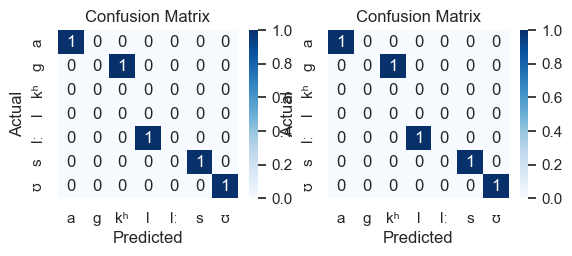

In [89]:
# Load ground truth data
actual_phones = ['s', 'g', 'ʊ', 'lː', 'a']

# Predict phones using the model
predicted_phones = ['s', 'kʰ', 'ʊ', 'l', 'a']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Load ground truth data
actual_phones = ['s', 'g', 'ʊ', 'lː', 'a']

# Predict phones using the model
predicted_phones = ['s', 'kʰ', 'ʊ', 'l', 'a']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)
plt.show

In [90]:
# Skaffa: s g a fː a
print('Faroese word: "Skaffa"')
print('Actual phones:               s g a fː a')
phones = model.recognize('audio/Skaffa.wav', 'fao')
print('Predicted phones(fao model):', phones)
phones_fao = model_fao.recognize('audio/Skaffa.wav', 'fao')
print('Predicted phones(IPA model):', phones_fao)

Faroese word: "Skaffa"
Actual phones:               s g a fː a
Predicted phones(fao model): j ɛ s o n
Predicted phones(IPA model): s g ɛ s ɛ


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Accuracy: 0.40
Precision: 1.00
Recall: 0.40
F1 Score: 0.57


<function matplotlib.pyplot.show(close=None, block=None)>

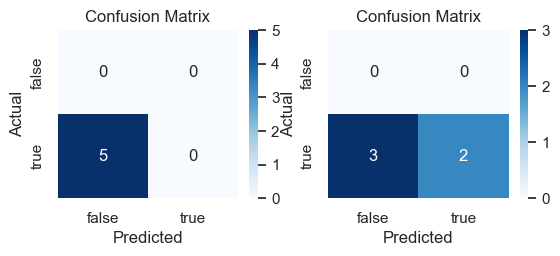

In [91]:
# Skaffa: s g a fː a -> j ɛ s o n
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['false', 'false', 'false', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Skaffa: s g a fː a -> s g ɛ s ɛ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'false', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

Accuracy: 0.38
Precision: 1.00
Recall: 0.38
F1 Score: 0.55
Accuracy: 0.88
Precision: 1.00
Recall: 0.88
F1 Score: 0.93


<function matplotlib.pyplot.show(close=None, block=None)>

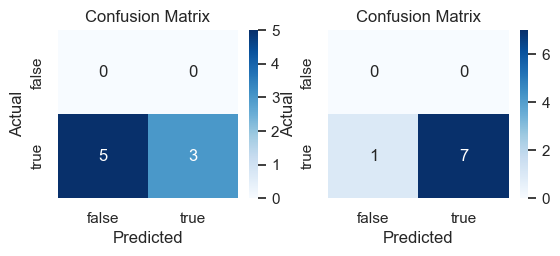

In [92]:
# Desember: d ɪ s ɛ m b ɪ ɹ -> ð ə s ɛ m ɹ ɛ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['false', 'false', 'true', 'true', 'true', 'false', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Desember: d ɪ s ɛ m b ɪ ɹ -> d ɪ s ɛ m b ɪ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

Accuracy: 0.40
Precision: 1.00
Recall: 0.40
F1 Score: 0.57
Accuracy: 0.80
Precision: 1.00
Recall: 0.80
F1 Score: 0.89


<function matplotlib.pyplot.show(close=None, block=None)>

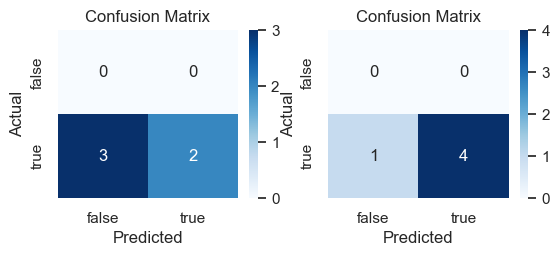

In [93]:
# Skula: s g ʊ lː a -> s b u l a
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'false', 'false', 'false', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Skula: s g ʊ lː a -> s kʰ ʊ l a
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'false', 'true', 'true', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

Accuracy: 0.40
Precision: 1.00
Recall: 0.40
F1 Score: 0.57
Accuracy: 0.75
Precision: 1.00
Recall: 0.75
F1 Score: 0.86


<function matplotlib.pyplot.show(close=None, block=None)>

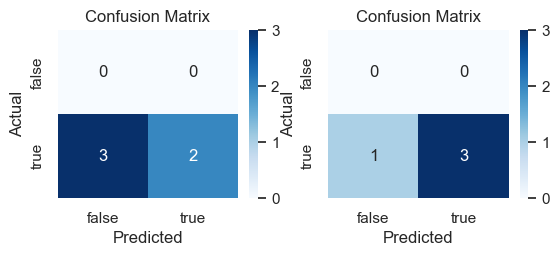

In [94]:
# Tosi: tʰ oː s ɪ -> tʰ ɔ s ɛ n
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'false', 'true', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Tosi: tʰ oː s ɪ -> tʰ u s ɪ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'false', 'true', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

Accuracy: 0.20
Precision: 1.00
Recall: 0.20
F1 Score: 0.33
Accuracy: 0.60
Precision: 1.00
Recall: 0.60
F1 Score: 0.75


<function matplotlib.pyplot.show(close=None, block=None)>

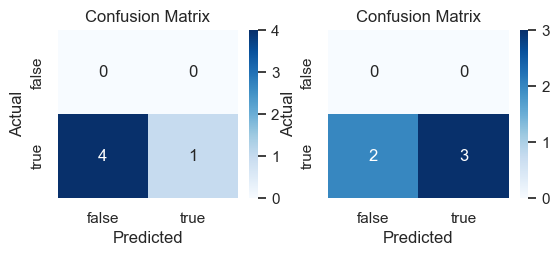

In [95]:
# Báðar: b ʊː w a ɹ -> u tʰ w ɛ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['false', 'false', 'true', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Báðar: b ʊː w a ɹ -> b uː w ɹː ɹ
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'false', 'true', 'false', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

Accuracy: 0.50
Precision: 1.00
Recall: 0.50
F1 Score: 0.67
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

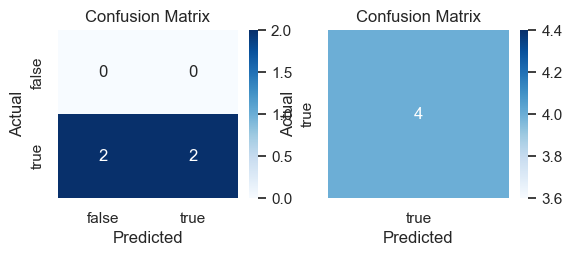

In [96]:
# Song: s ɔ ŋ g -> s ɔ w
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'false', 'false']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 1)


# Song: s ɔ ŋ g -> s ɔ ŋ g
# Load ground truth data
actual_phones = ['true', 'true', 'true', 'true']

# Predict phones using the model
predicted_phones = ['true', 'true', 'true', 'true']

# Evaluate the model
accuracy, precision, recall, f1, cm, labels = evaluate_model(actual_phones, predicted_phones)

# Display the results
display_metrics(accuracy, precision, recall, f1)
#display_predictions(predicted_phones)

# Display confusion matrix
display_confusion_matrix(cm, labels, 2)


plt.show

In [97]:
from sklearn.metrics.pairwise import euclidean_distances as dist
from sklearn.metrics.pairwise import cosine_similarity as cs

#            d, ɪ, s, ɛ, m, b, ɹ, ð, ə, tʰ oː u, ɔ, n
desember1 = [1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0] # d ɪ s ɛ m b ɪ ɹ
desember2 = [1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] # d ɪ s ɛ m b ɪ
desember3 = [0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0] # ð ə s ɛ m ɹ ɛ
desember4 = [1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0] # d ɪ s ɛ m b ɪ ð
tosi1 =     [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0] # tʰ oː s ɪ
tosi2 =     [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0] # tʰ u s ɪ
tosi3 =     [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1] # tʰ ɔ s ɛ n

corpus = np.array([desember1, desember2, desember3, desember4, tosi1, tosi2, tosi3])

# find closest to D4
D4 = [corpus[3]]

# Euclidian distance (closest is the lowest number)
e_dist = dist(corpus, D4)
print(e_dist)
# Cosine similarity (closest is the highest number closest to 1)
c_sim = cs(corpus, D4)
print(c_sim)

[[1.41421356]
 [1.        ]
 [3.        ]
 [0.        ]
 [2.82842712]
 [2.82842712]
 [3.31662479]]
[[0.9       ]
 [0.9486833 ]
 [0.52704628]
 [1.        ]
 [0.47434165]
 [0.47434165]
 [0.28284271]]


In [98]:
from sklearn.metrics.pairwise import euclidean_distances as dist
from sklearn.metrics.pairwise import cosine_similarity as cs

Herborg_1 = priority('audio/telja/Herborg_1.wav', 0)
Herborg_2 = priority('audio/telja/Herborg_2.wav', 0)
Herborg_3 = priority('audio/telja/Herborg_3.wav', 0)
Herborg_4 = priority('audio/telja/Herborg_4.wav', 0)
Herborg_5 = priority('audio/telja/Herborg_5.wav', 0)
Herborg_6 = priority('audio/telja/Herborg_6.wav', 0)
Herborg_7 = priority('audio/telja/Herborg_7.wav', 0)
Herborg_8 = priority('audio/telja/Herborg_8.wav', 0)
Herborg_9 = priority('audio/telja/Herborg_9.wav', 0)
Herborg_10 = priority('audio/telja/Herborg_10.wav', 0)
Mialy_1 = priority('audio/telja/Mialy_1.wav', 0)
Mialy_2 = priority('audio/telja/Mialy_2.wav', 0)
Mialy_3 = priority('audio/telja/Mialy_3.wav', 0)
Mialy_4 = priority('audio/telja/Mialy_4.wav', 0)
Mialy_5 = priority('audio/telja/Mialy_5.wav', 0)
Mialy_6 = priority('audio/telja/Mialy_6.wav', 0)
Mialy_7 = priority('audio/telja/Mialy_7.wav', 0)
Mialy_8 = priority('audio/telja/Mialy_8.wav', 0)
Mialy_9 = priority('audio/telja/Mialy_9.wav', 0)
Mialy_10 = priority('audio/telja/Mialy_10.wav', 0)
Marna_1 = priority('audio/telja/Marna_1.wav', 0)
Marna_2 = priority('audio/telja/Marna_2.wav', 0)
Marna_3 = priority('audio/telja/Marna_3.wav', 0)
Marna_4 = priority('audio/telja/Marna_4.wav', 0)
Marna_5 = priority('audio/telja/Marna_5.wav', 0)
Marna_6 = priority('audio/telja/Marna_6.wav', 0)
Marna_7 = priority('audio/telja/Marna_7.wav', 0)
Marna_8 = priority('audio/telja/Marna_8.wav', 0)
Marna_9 = priority('audio/telja/Marna_9.wav', 0)
Marna_10 = priority('audio/telja/Marna_10.wav', 0)
Ola_1 = priority('audio/telja/Ola_1.wav', 0)
Ola_2 = priority('audio/telja/Ola_2.wav', 0)
Ola_3 = priority('audio/telja/Ola_3.wav', 0)
Ola_4 = priority('audio/telja/Ola_4.wav', 0)
Ola_5 = priority('audio/telja/Ola_5.wav', 0)
Ola_6 = priority('audio/telja/Ola_6.wav', 0)
Ola_7 = priority('audio/telja/Ola_7.wav', 0)
Ola_8 = priority('audio/telja/Ola_8.wav', 0)
Ola_9 = priority('audio/telja/Ola_9.wav', 0)
Ola_10 = priority('audio/telja/Ola_10.wav', 0)

# combine all lists
all_phones = Herborg_1 + Herborg_2 + Herborg_3 + Herborg_4 + Herborg_5 + Herborg_6 + Herborg_7 + Herborg_8 + Herborg_9 + Herborg_10 + Mialy_1 + Mialy_2 + Mialy_3 + Mialy_4 + Mialy_5 + Mialy_6 + Mialy_7 + Mialy_8 + Mialy_9 + Mialy_10 + Marna_1 + Marna_2 + Marna_3 + Marna_4 + Marna_5 + Marna_6 + Marna_7 + Marna_8 + Marna_9 + Marna_10 + Ola_1 + Ola_2 + Ola_3 + Ola_4 + Ola_5 + Ola_6 + Ola_7 + Ola_8 + Ola_9 + Ola_10
# Remove duplicates
phones_list = list(set(all_phones))

# Create new lists with 1 as position filled and 0 as not filled
for prefix in ['HK', 'MZ', 'MK', 'OK']:
    for i in range(1, 11):
        exec(f'{prefix}_{i} = []')

for p in phones_list:
    HK_1.append(Herborg_1.count(p))
    HK_2.append(Herborg_2.count(p))
    HK_3.append(Herborg_3.count(p))
    HK_4.append(Herborg_4.count(p))
    HK_5.append(Herborg_5.count(p))
    HK_6.append(Herborg_6.count(p))
    HK_7.append(Herborg_7.count(p))
    HK_8.append(Herborg_8.count(p))
    HK_9.append(Herborg_9.count(p))
    HK_10.append(Herborg_10.count(p))
    MZ_1.append(Mialy_1.count(p))
    MZ_2.append(Mialy_2.count(p))
    MZ_3.append(Mialy_3.count(p))
    MZ_4.append(Mialy_4.count(p))
    MZ_5.append(Mialy_5.count(p))
    MZ_6.append(Mialy_6.count(p))
    MZ_7.append(Mialy_7.count(p))
    MZ_8.append(Mialy_8.count(p))
    MZ_9.append(Mialy_9.count(p))
    MZ_10.append(Mialy_10.count(p))
    MK_1.append(Marna_1.count(p))
    MK_2.append(Marna_2.count(p))
    MK_3.append(Marna_3.count(p))
    MK_4.append(Marna_4.count(p))
    MK_5.append(Marna_5.count(p))
    MK_6.append(Marna_6.count(p))
    MK_7.append(Marna_7.count(p))
    MK_8.append(Marna_8.count(p))
    MK_9.append(Marna_9.count(p))
    MK_10.append(Marna_10.count(p))
    OK_1.append(Ola_1.count(p))
    OK_2.append(Ola_2.count(p))
    OK_3.append(Ola_3.count(p))
    OK_4.append(Ola_4.count(p))
    OK_5.append(Ola_5.count(p))
    OK_6.append(Ola_6.count(p))
    OK_7.append(Ola_7.count(p))
    OK_8.append(Ola_8.count(p))
    OK_9.append(Ola_9.count(p))
    OK_10.append(Ola_10.count(p))


corpus = np.array([HK_1, HK_2, HK_3, HK_4, HK_5, HK_6, HK_7, HK_8, HK_9, HK_10, 
                   MZ_1, MZ_2, MZ_3, MZ_4, MZ_5, MZ_6, MZ_7, MZ_8, MZ_9, MZ_10, 
                   MK_1, MK_2, MK_3, MK_4, MK_5, MK_6, MK_7, MK_8, MK_9, MK_10, 
                   OK_1, OK_2, OK_3, OK_4, OK_5, OK_6, OK_7, OK_8, OK_9, OK_10])
#corpus

# find closest to
find_1 = [corpus[0]]
find_2 = [corpus[1]]
find_5 = [corpus[4]]

# Euclidian distance (closest is the lowest number)
e_dist = dist(corpus, find_5)
print(e_dist)

# Cosine similarity (closest is the highest number closest to 1)
c_sim = cs(corpus, find_5)
#print(c_sim)


[[2.44948974]
 [2.44948974]
 [2.23606798]
 [2.44948974]
 [0.        ]
 [2.23606798]
 [1.73205081]
 [2.64575131]
 [2.64575131]
 [2.64575131]
 [2.44948974]
 [2.44948974]
 [2.64575131]
 [2.44948974]
 [0.        ]
 [3.        ]
 [2.23606798]
 [2.64575131]
 [2.64575131]
 [2.64575131]
 [2.82842712]
 [2.44948974]
 [2.23606798]
 [2.44948974]
 [2.23606798]
 [2.44948974]
 [2.23606798]
 [2.64575131]
 [2.64575131]
 [2.64575131]
 [2.64575131]
 [1.41421356]
 [2.64575131]
 [2.        ]
 [1.41421356]
 [3.        ]
 [2.23606798]
 [2.64575131]
 [2.82842712]
 [2.82842712]]
